# KNN Zoo Classification

### Machine Learning Mini Project

This notebook contains the implementation of **K-Nearest Neighbors (KNN)**
algorithm using the Zoo dataset.


## Environment Setup

In [1]:
import sys
import os

# Adding src folder so Python can find project files
sys.path.append(os.path.abspath("src"))

## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np

from load_data import load_zoo_data
from preprocess import preprocess_data
from knn_model import train_knn, find_best_k
from evaluate import evaluate_model
from visualize import generate_all_visualizations

## Dataset Loading

In this step, the Zoo dataset is loaded from the data folder.


In [3]:
df = load_zoo_data()
df.head()

[INFO] Preparing output directories...
[INFO] Loading dataset from: data/Zoo.csv
[INFO] Dataset loaded successfully.
[INFO] Dataset shape: (101, 18)
[INFO] Columns: ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Data Preprocessing

The dataset is checked for missing values and scaled because
KNN depends on distance calculation.


In [4]:
df_processed = preprocess_data(df)
df_processed.head()


[INFO] Starting preprocessing pipeline...

[INFO] Checking for missing values...
[INFO] No missing values found.

[INFO] Detecting outliers using Z-score...
[INFO] Total outliers detected: 8

[INFO] Scaling features using StandardScaler...
[INFO] Feature scaling completed.
[INFO] Preprocessing completed successfully.


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,animal name,type
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,aardvark,1
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,antelope,1
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,bass,4
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,bear,1
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,boar,1


## Finding Best K Value

Different K values are tested to find the best one.


In [5]:
best_k = find_best_k(df_processed)
print("Best K value:", best_k)


[INFO] Finding best K value...
[INFO] K=1 → Accuracy=1.0000
[INFO] K=3 → Accuracy=0.9802
[INFO] K=5 → Accuracy=0.9802
[INFO] K=7 → Accuracy=0.9505
[INFO] K=9 → Accuracy=0.9505
[INFO] K=11 → Accuracy=0.9010
[INFO] K=13 → Accuracy=0.8812
[RESULT] Best K = 1 (Accuracy = 1.0000)
Best K value: 1


## Model Training

The KNN model is trained using the selected K value.


In [6]:
model, X_test, y_test = train_knn(df_processed, k=best_k)


[INFO] Starting KNN training...
[INFO] Splitting dataset into training and testing sets...
[INFO] Training size: (80, 16)
[INFO] Testing size:  (21, 16)
[INFO] Training KNN model with K=1, metric='minkowski'
[INFO] KNN model training completed.
[INFO] Model saved: output/models/knn_model.pkl


## Model Evaluation

The trained model is evaluated using accuracy, precision,
recall and F1-score.


In [7]:
metrics = evaluate_model(model, X_test, y_test)

for k, v in metrics.items():
    print(k, ":", round(v, 4))


[INFO] Evaluating KNN model...
[INFO] Accuracy:  1.0000
[INFO] Precision: 1.0000
[INFO] Recall:    1.0000
[INFO] F1-score:  1.0000
[INFO] Report saved: output/reports/classification_report.txt
[INFO] Report saved: output/reports/metrics.txt
[INFO] Generating confusion matrix...
[INFO] Confusion matrix saved: output/reports/confusion_matrix.png
[INFO] Model evaluation completed.
accuracy : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0


## Confusion Matrix

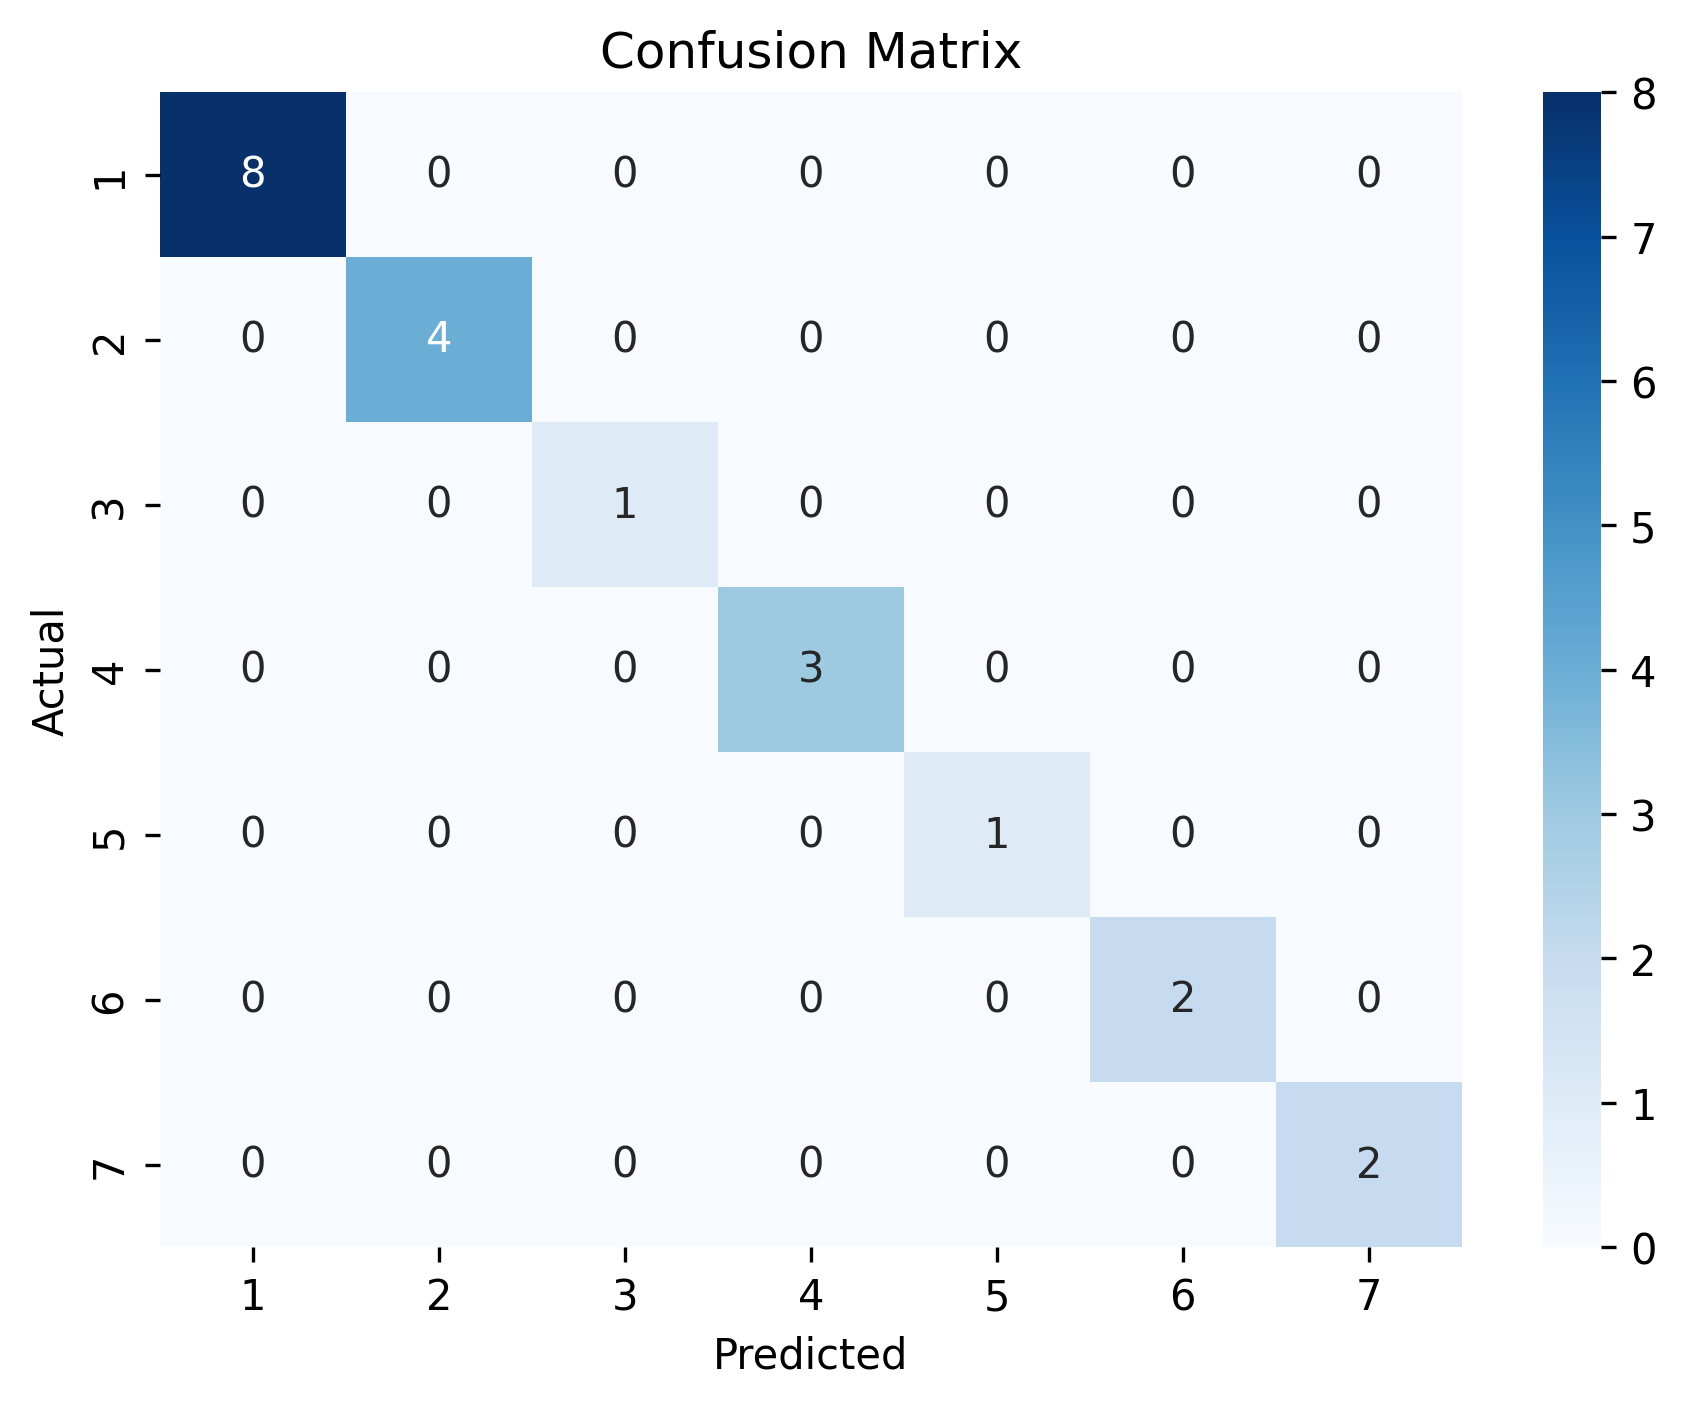

In [8]:
from IPython.display import Image, display
display(Image(filename="output/reports/confusion_matrix.png"))

## Data Visualization

Graphs are generated to understand the data and model behavior.


In [9]:
generate_all_visualizations(df_processed)


[INFO] Running visualization pipeline...

[INFO] Creating distribution plots...
[INFO] Plot saved: output/plots/dist_hair.png
[INFO] Plot saved: output/plots/dist_feathers.png
[INFO] Plot saved: output/plots/dist_eggs.png
[INFO] Plot saved: output/plots/dist_milk.png
[INFO] Plot saved: output/plots/dist_airborne.png
[INFO] Plot saved: output/plots/dist_aquatic.png
[INFO] Plot saved: output/plots/dist_predator.png
[INFO] Plot saved: output/plots/dist_toothed.png
[INFO] Plot saved: output/plots/dist_backbone.png
[INFO] Plot saved: output/plots/dist_breathes.png
[INFO] Plot saved: output/plots/dist_venomous.png
[INFO] Plot saved: output/plots/dist_fins.png
[INFO] Plot saved: output/plots/dist_legs.png
[INFO] Plot saved: output/plots/dist_tail.png
[INFO] Plot saved: output/plots/dist_domestic.png
[INFO] Plot saved: output/plots/dist_catsize.png
[INFO] Plot saved: output/plots/dist_type.png

[INFO] Generating correlation heatmap...
[INFO] Plot saved: output/plots/correlation_heatmap.png

[

### Output Graphs

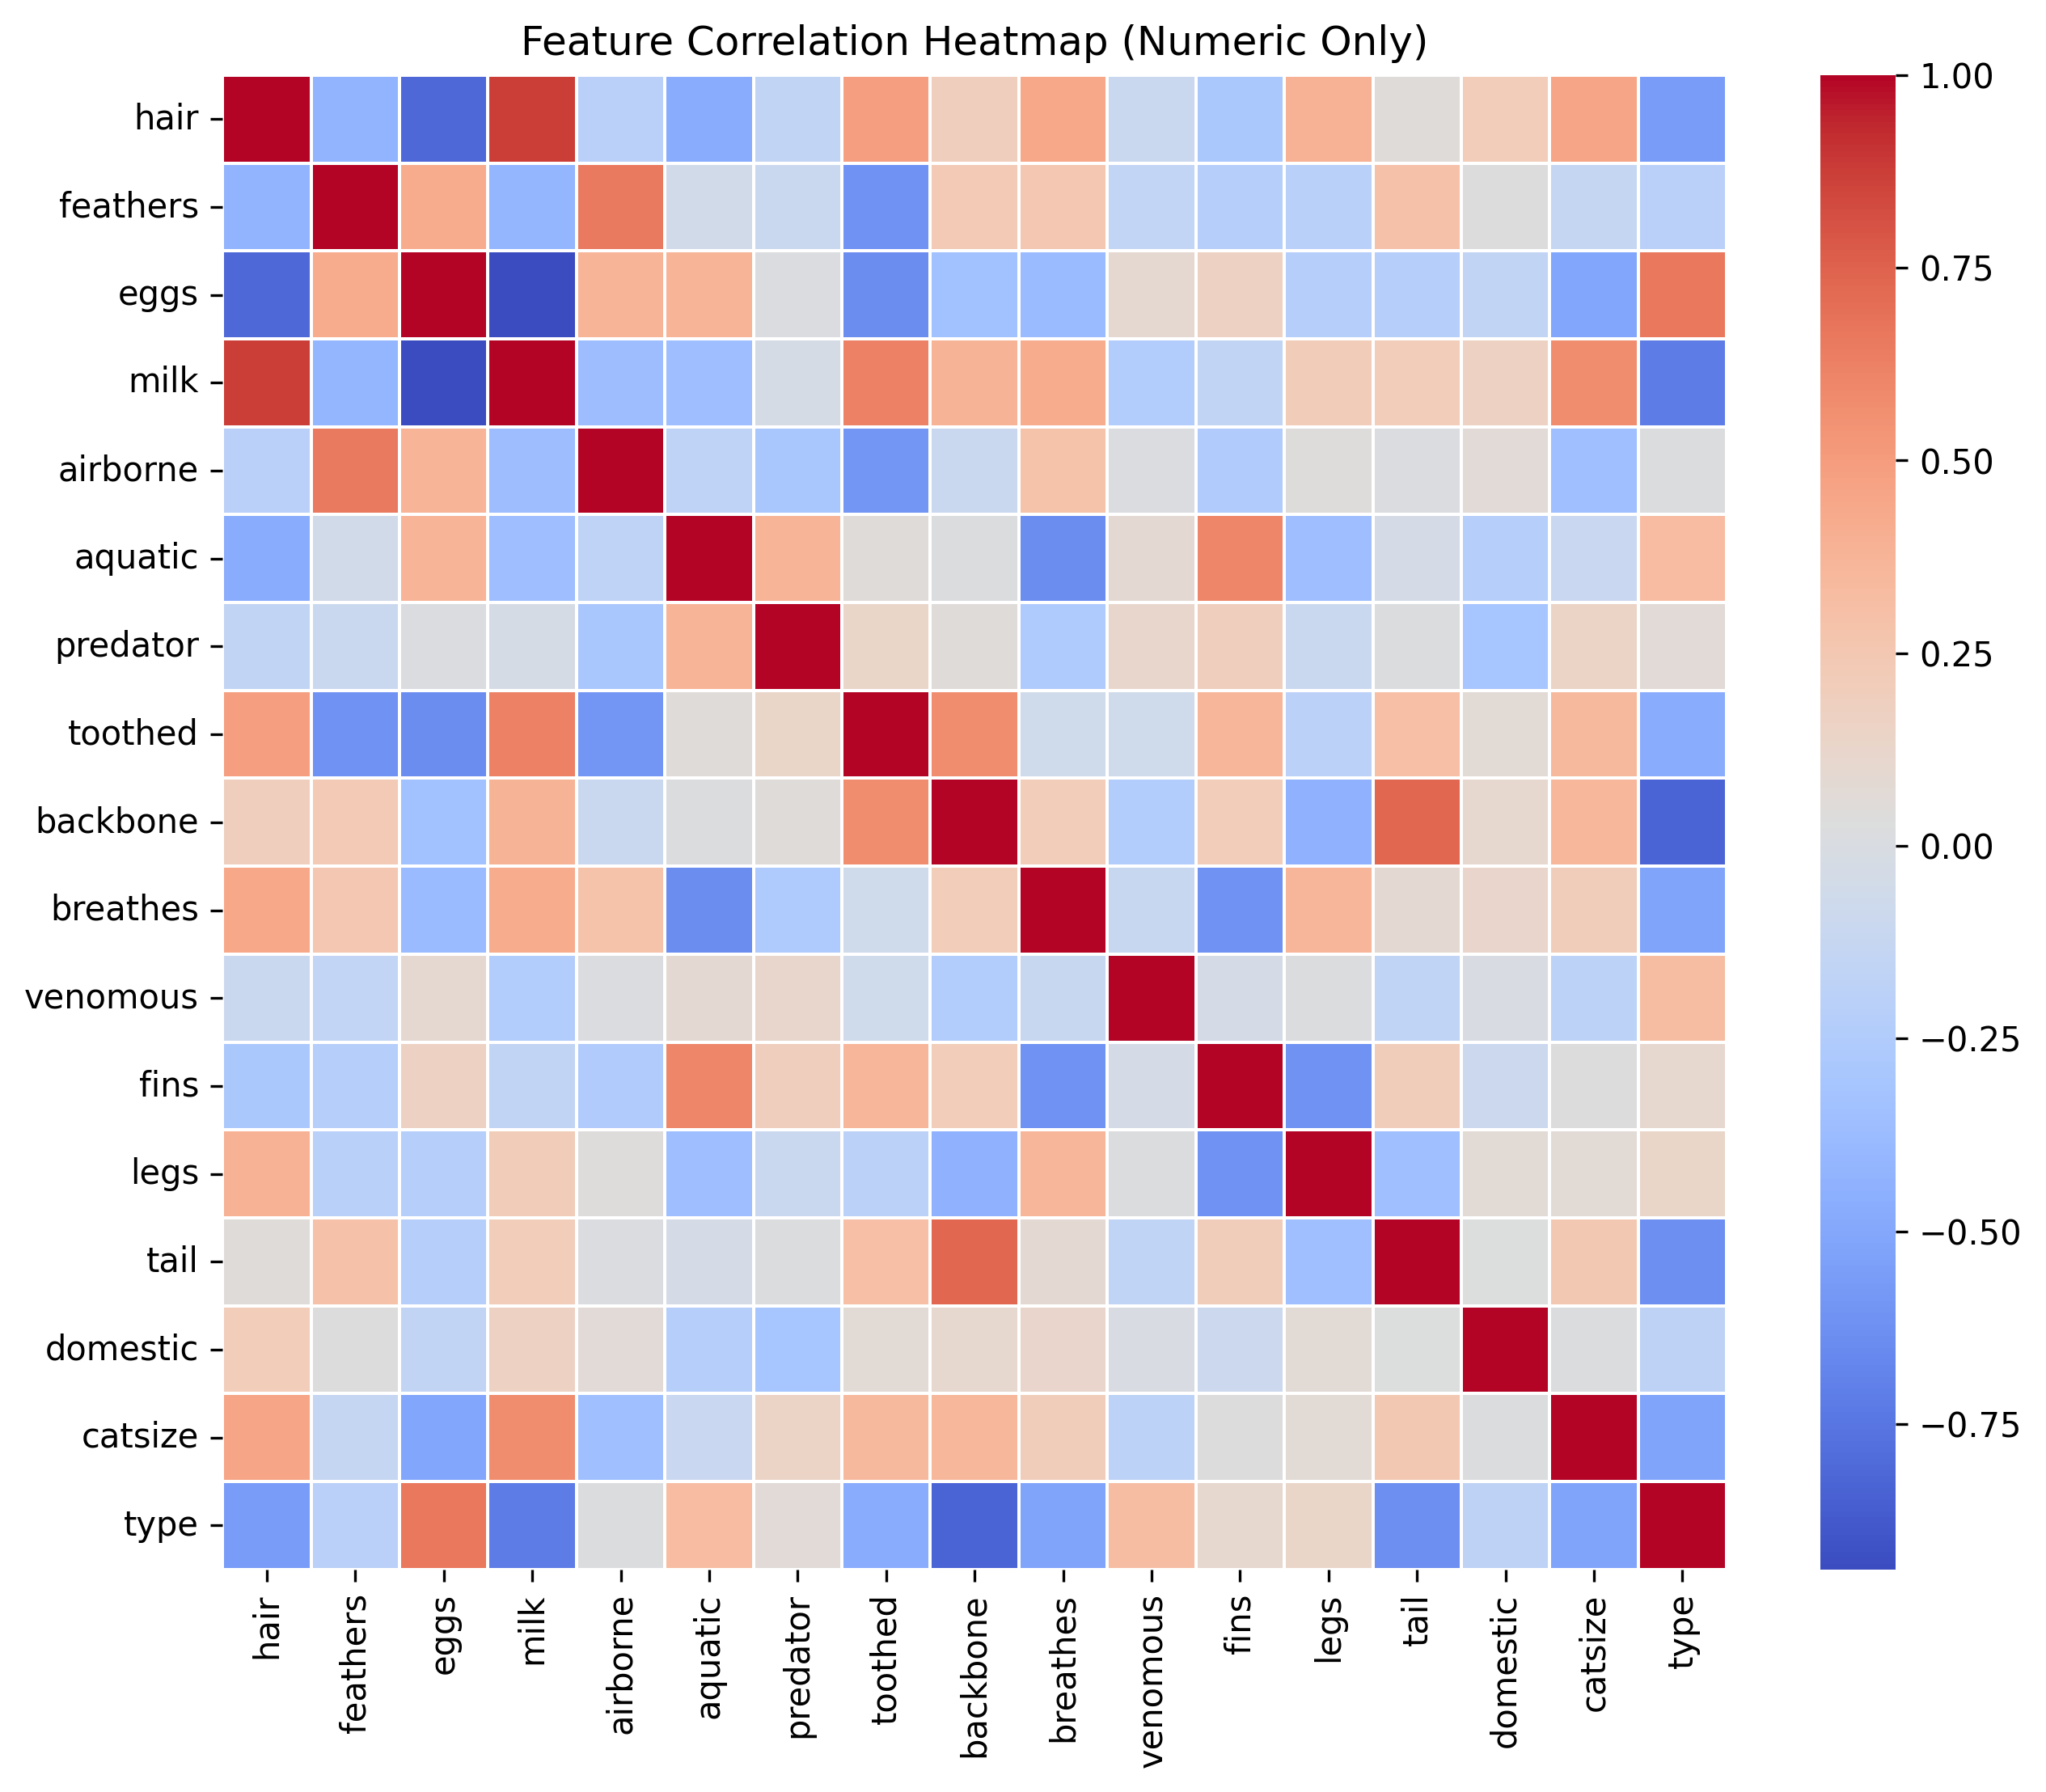

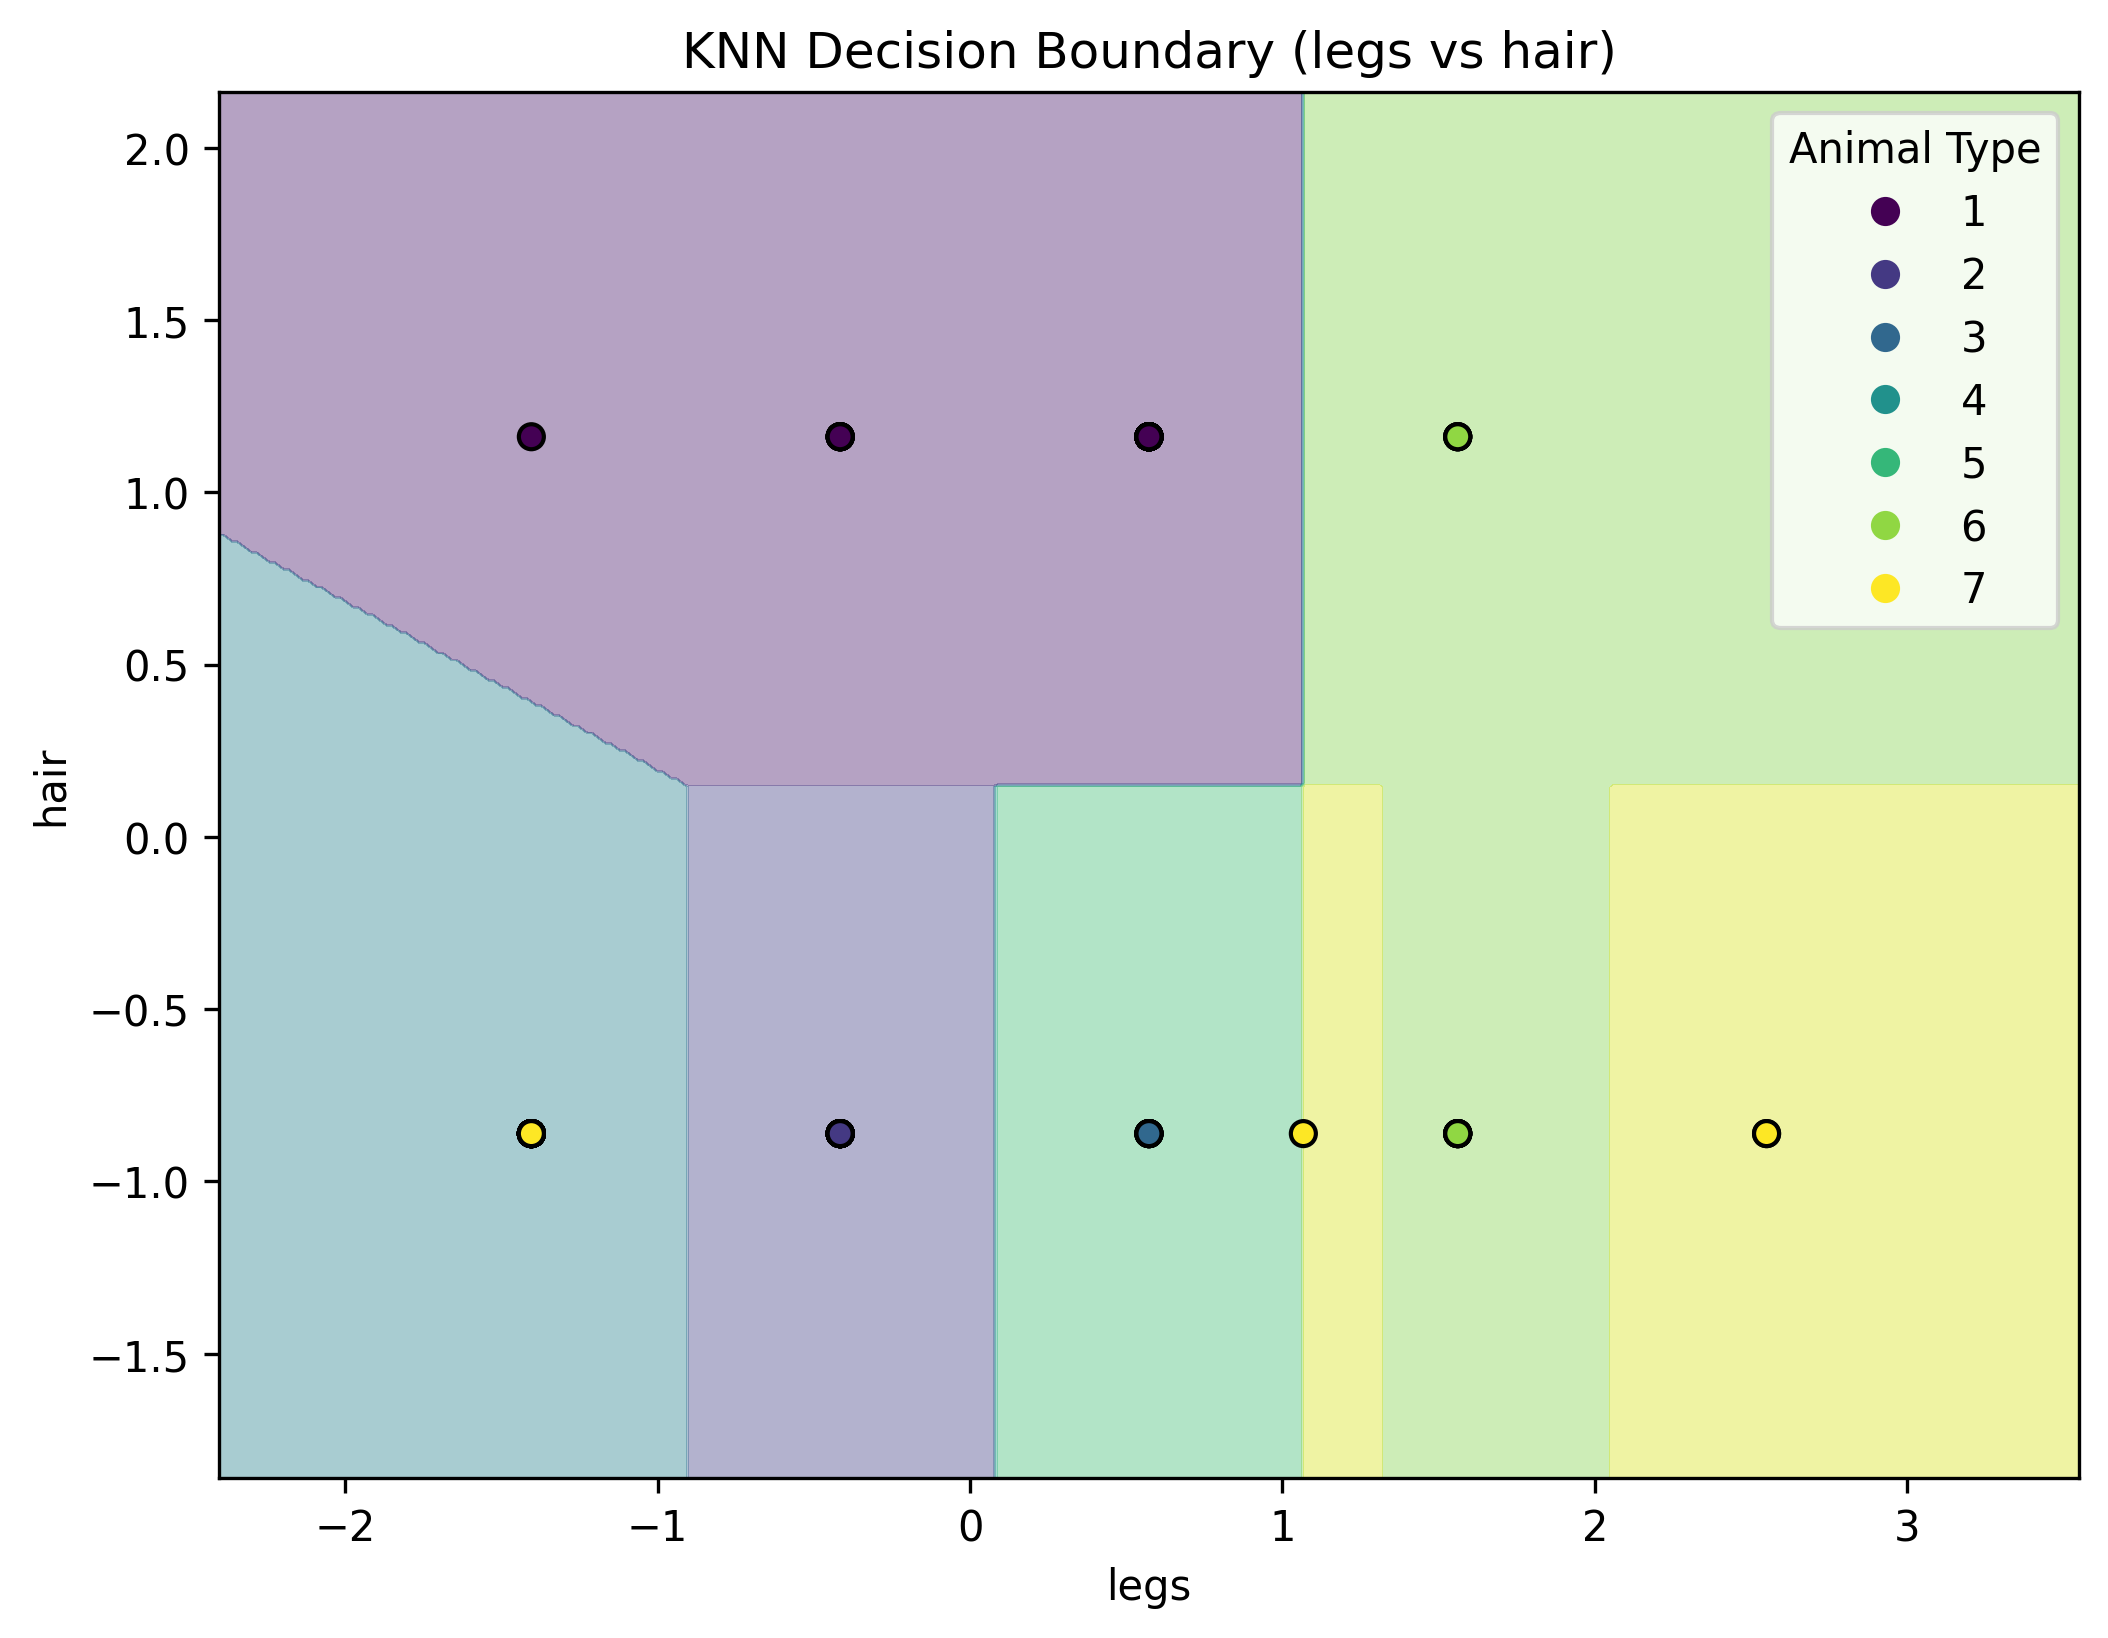

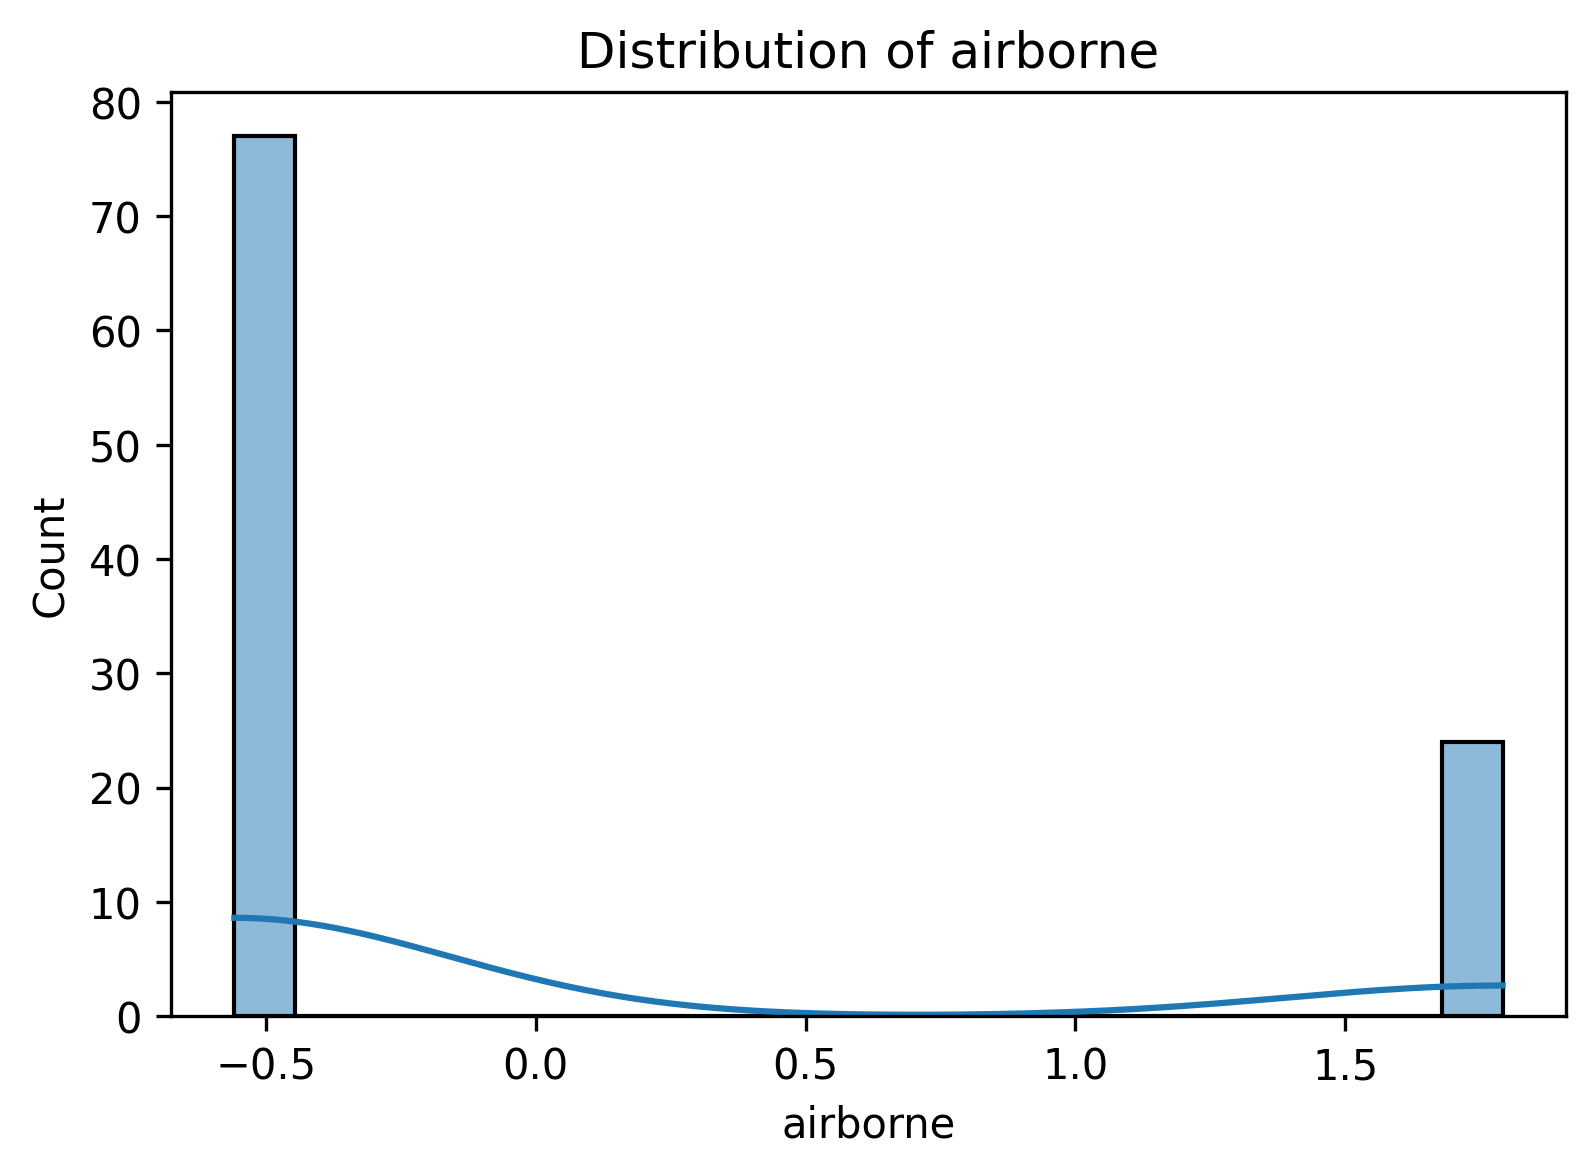

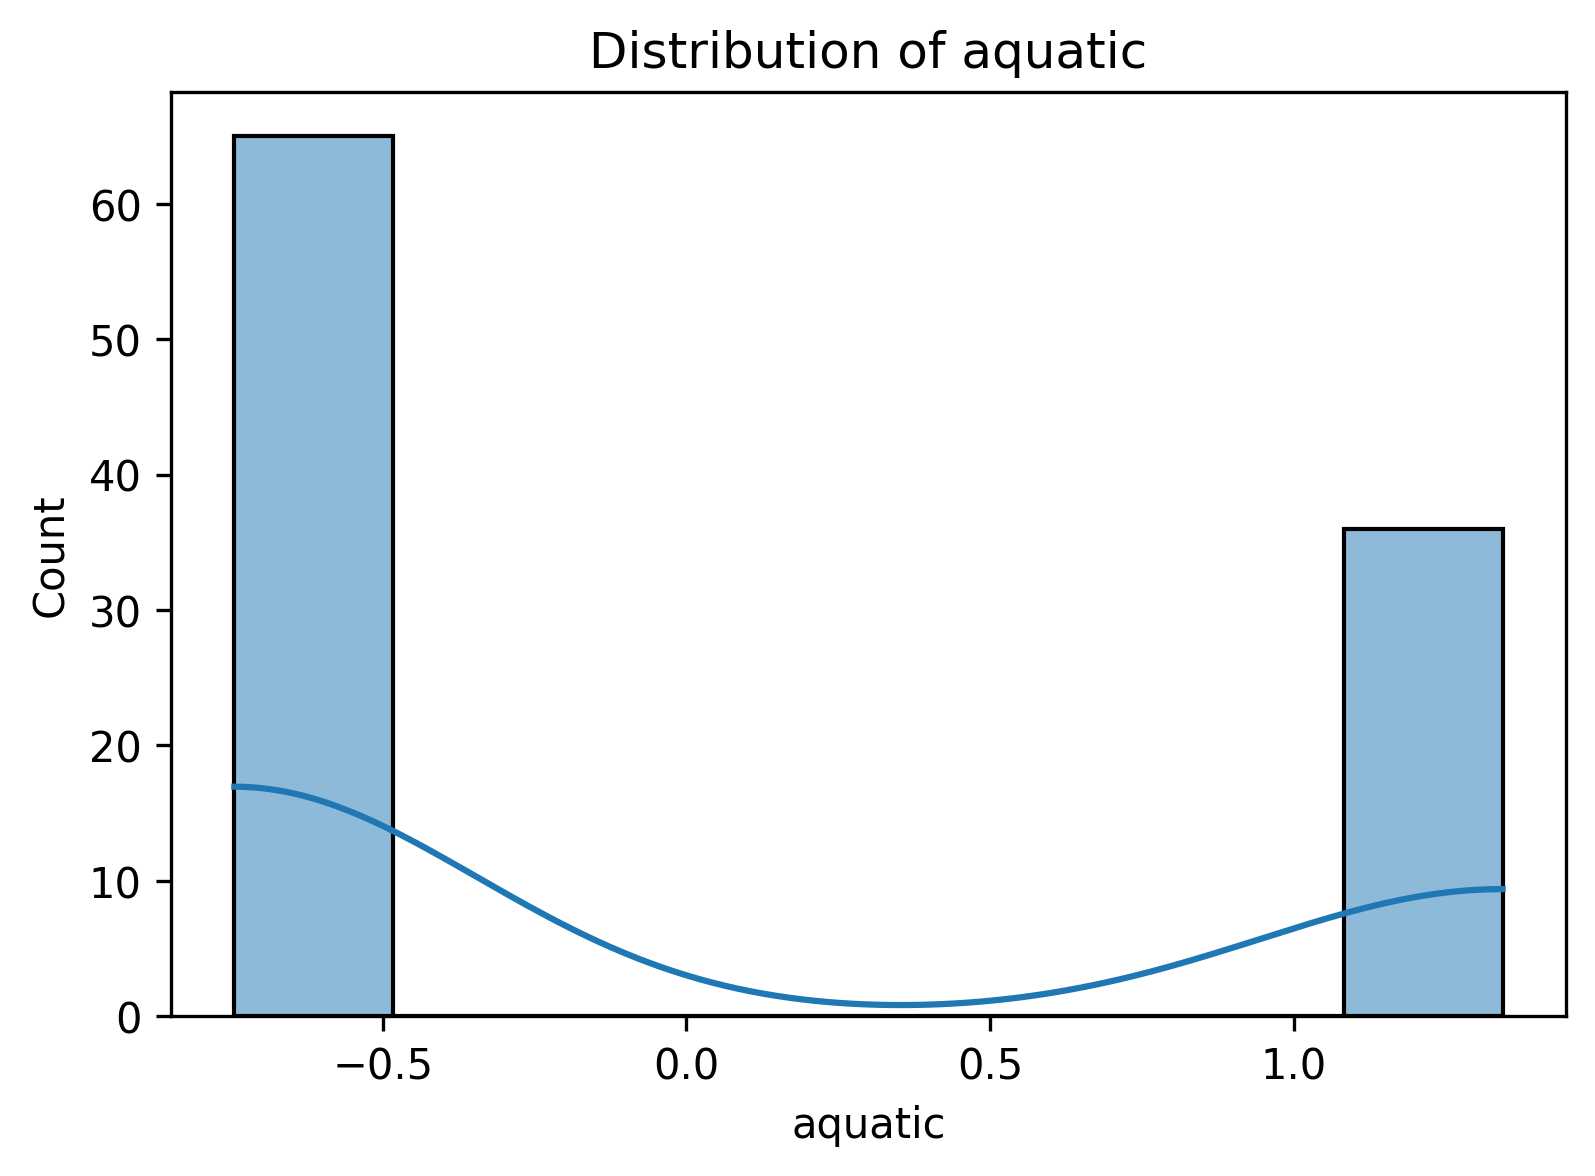

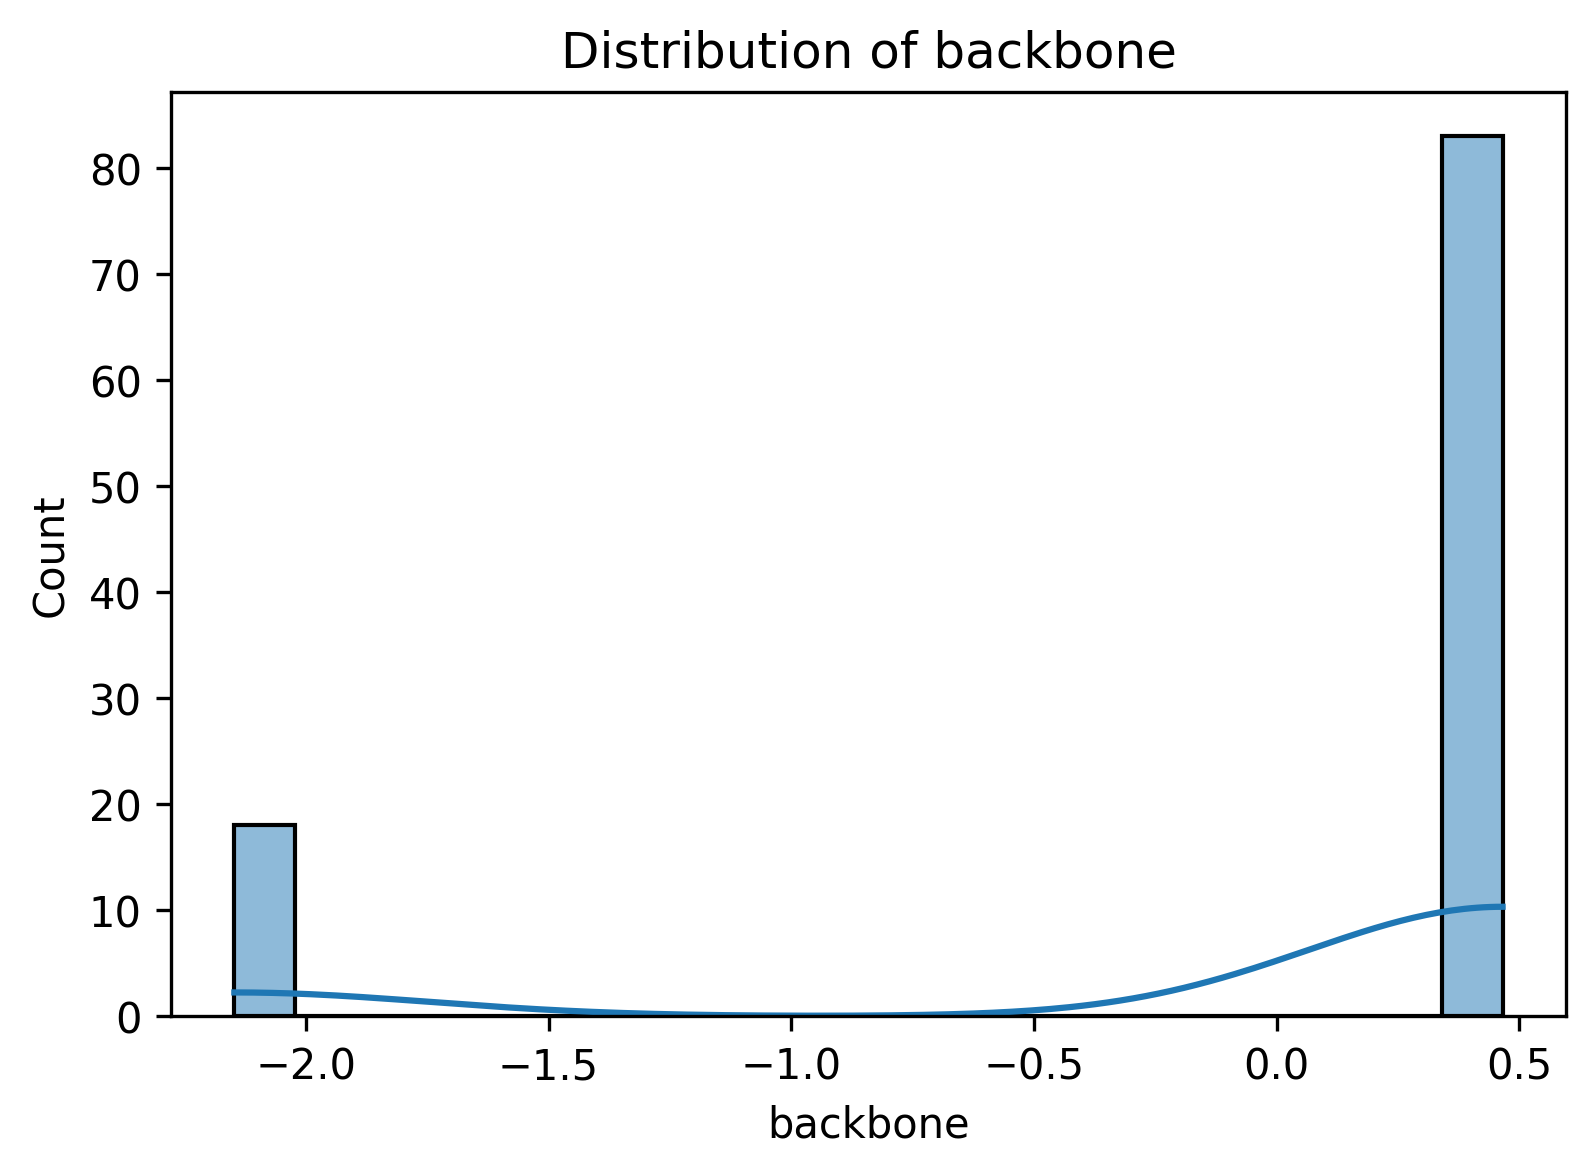

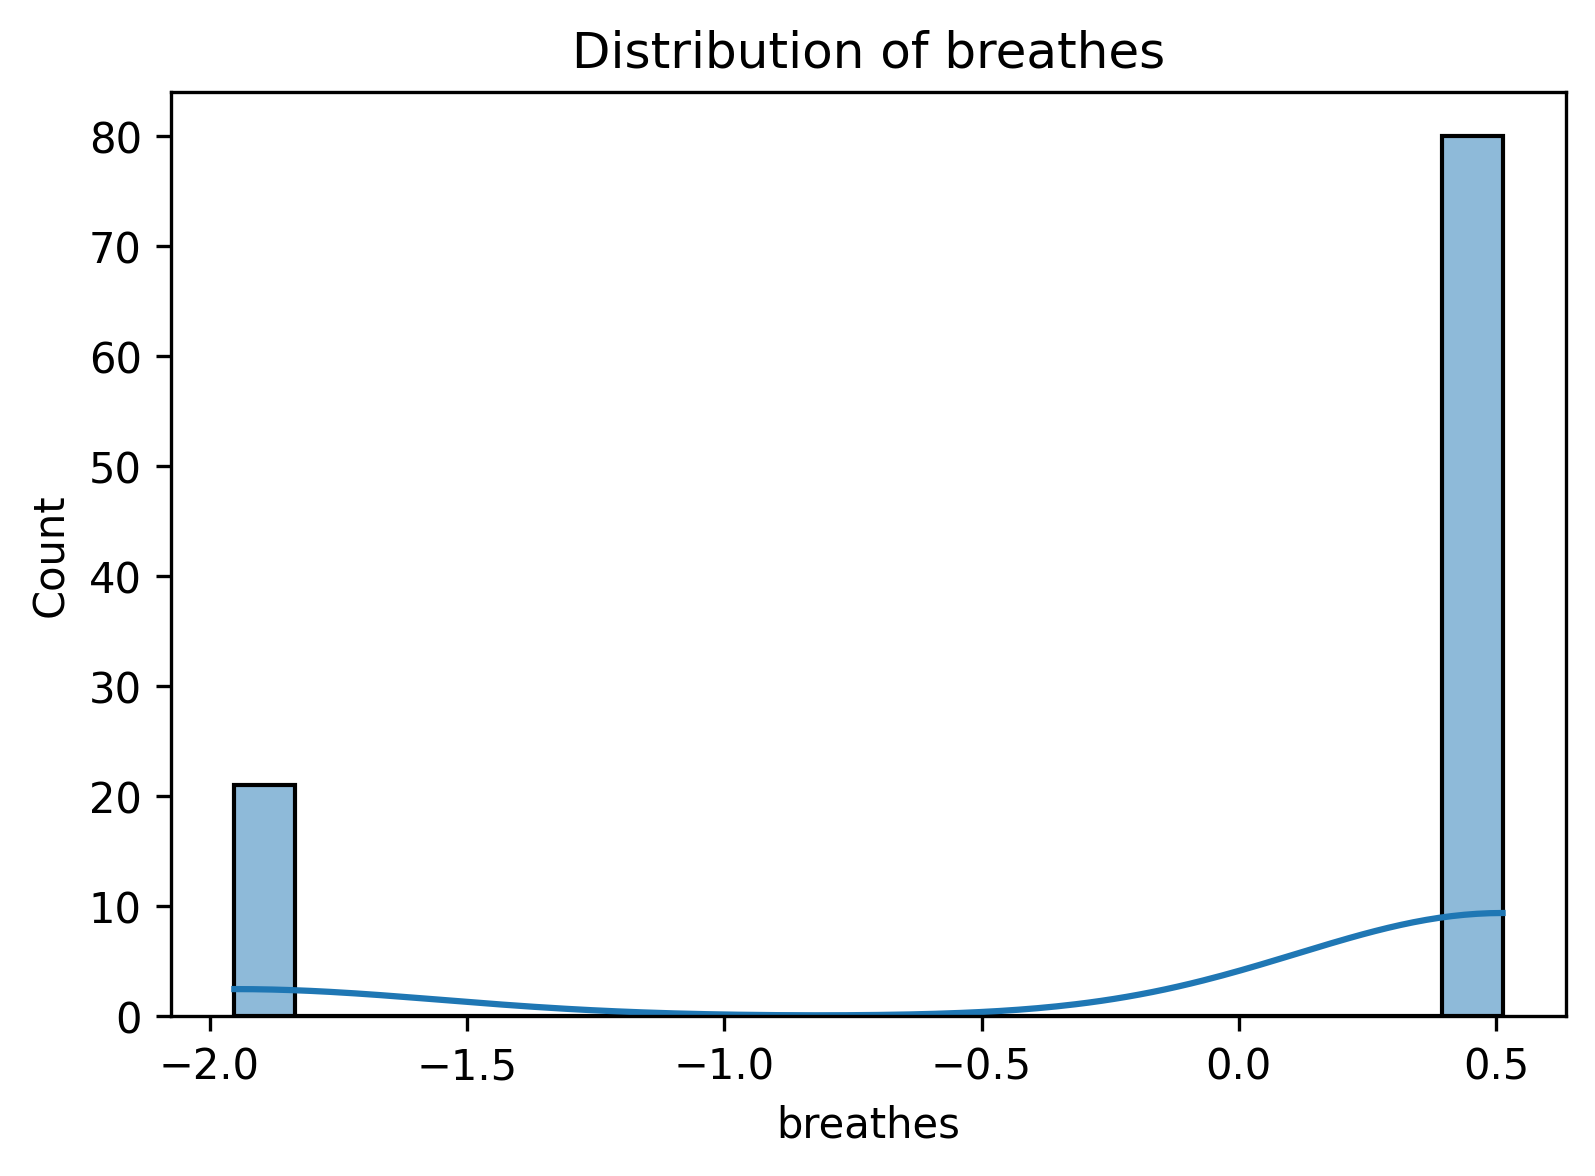

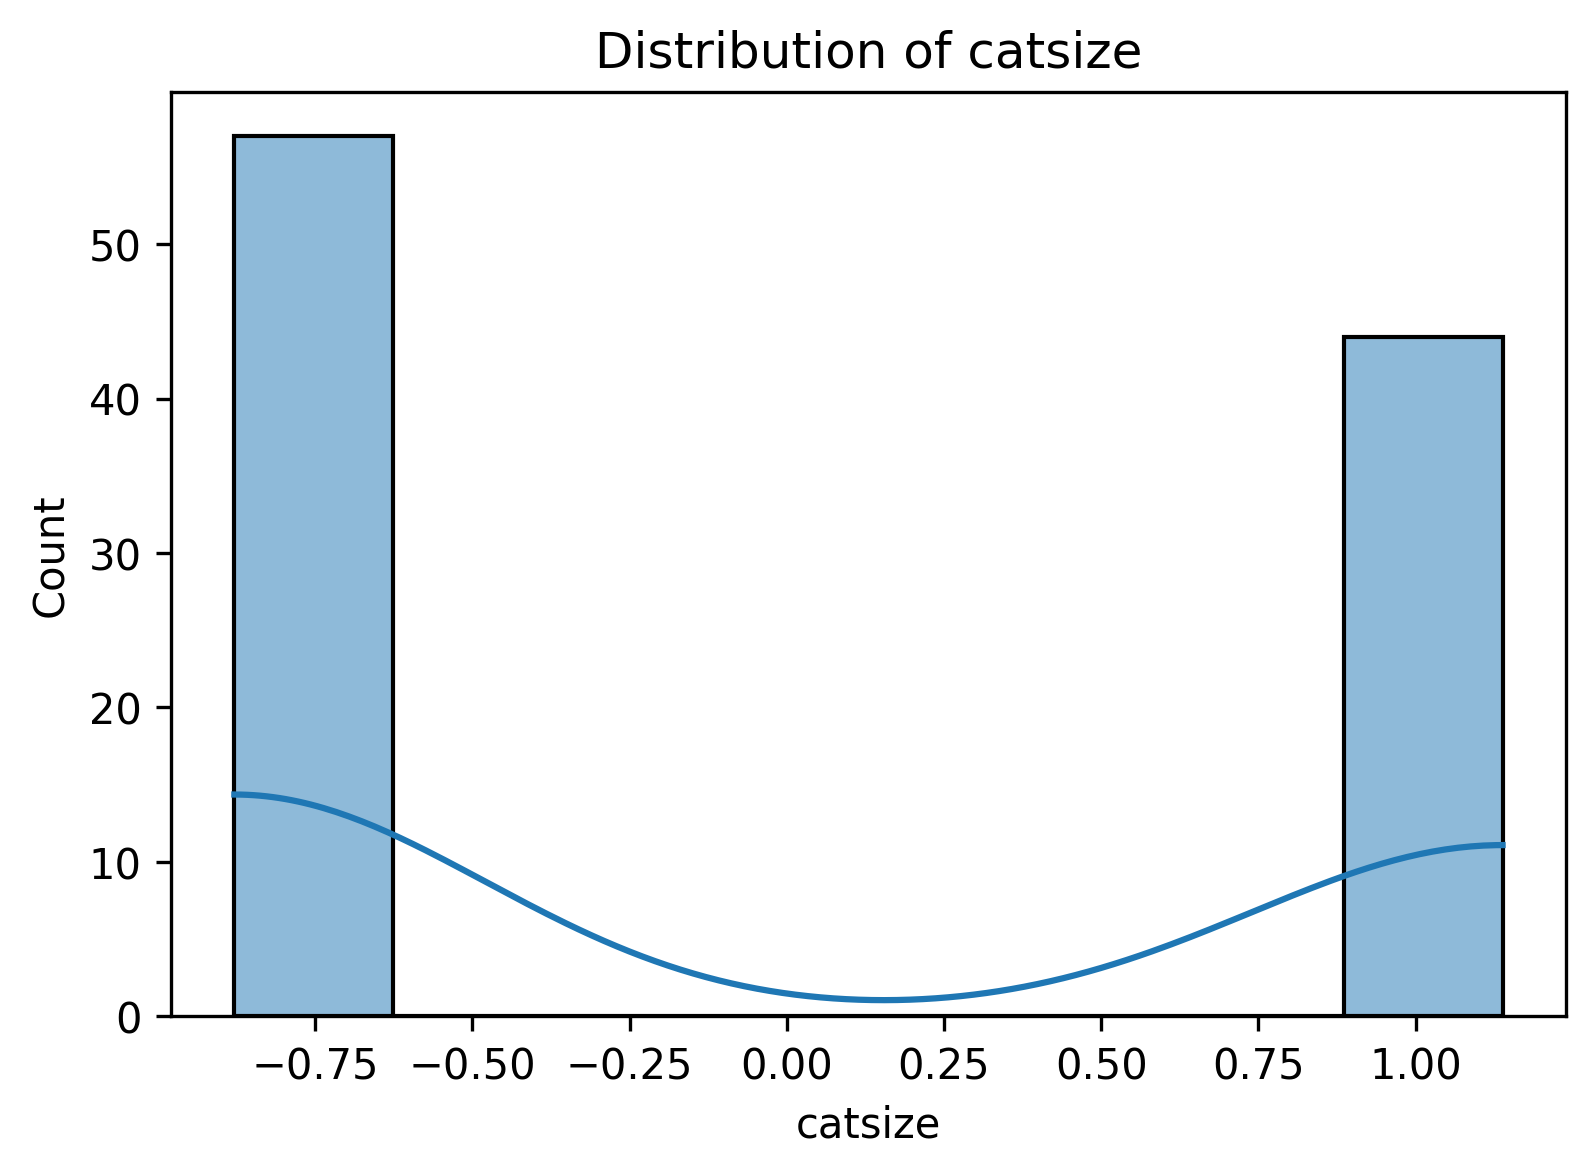

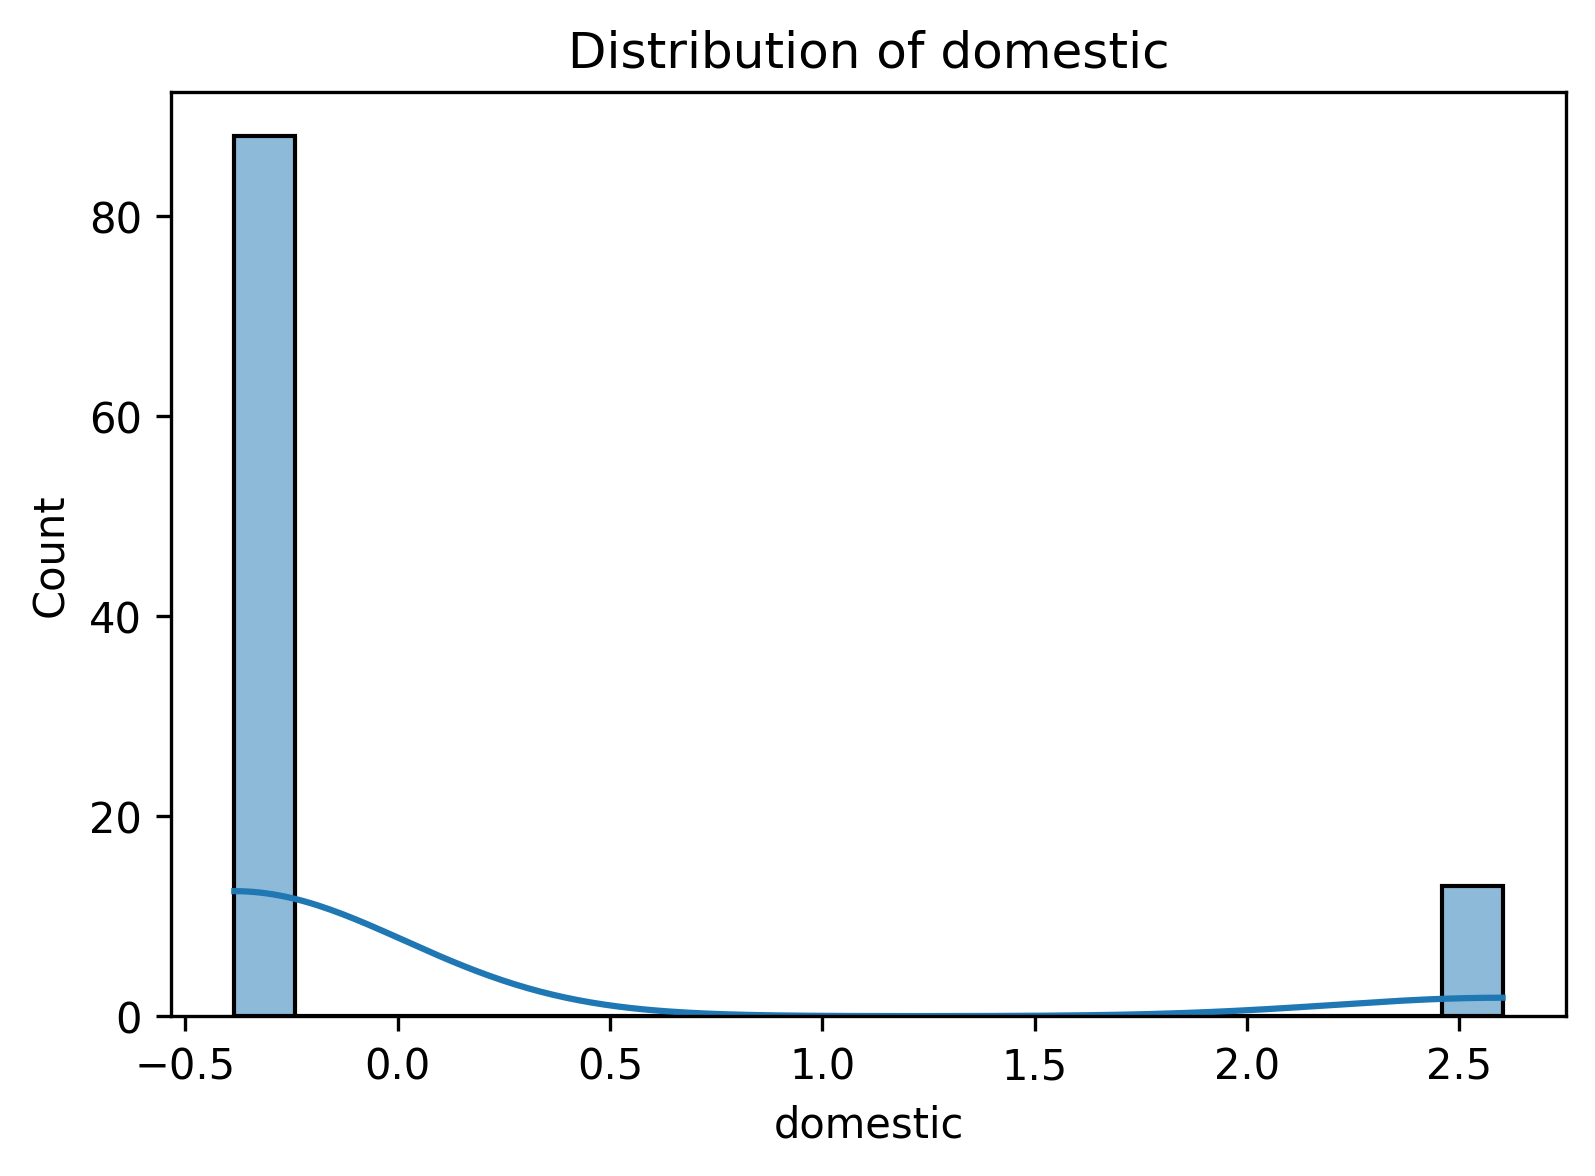

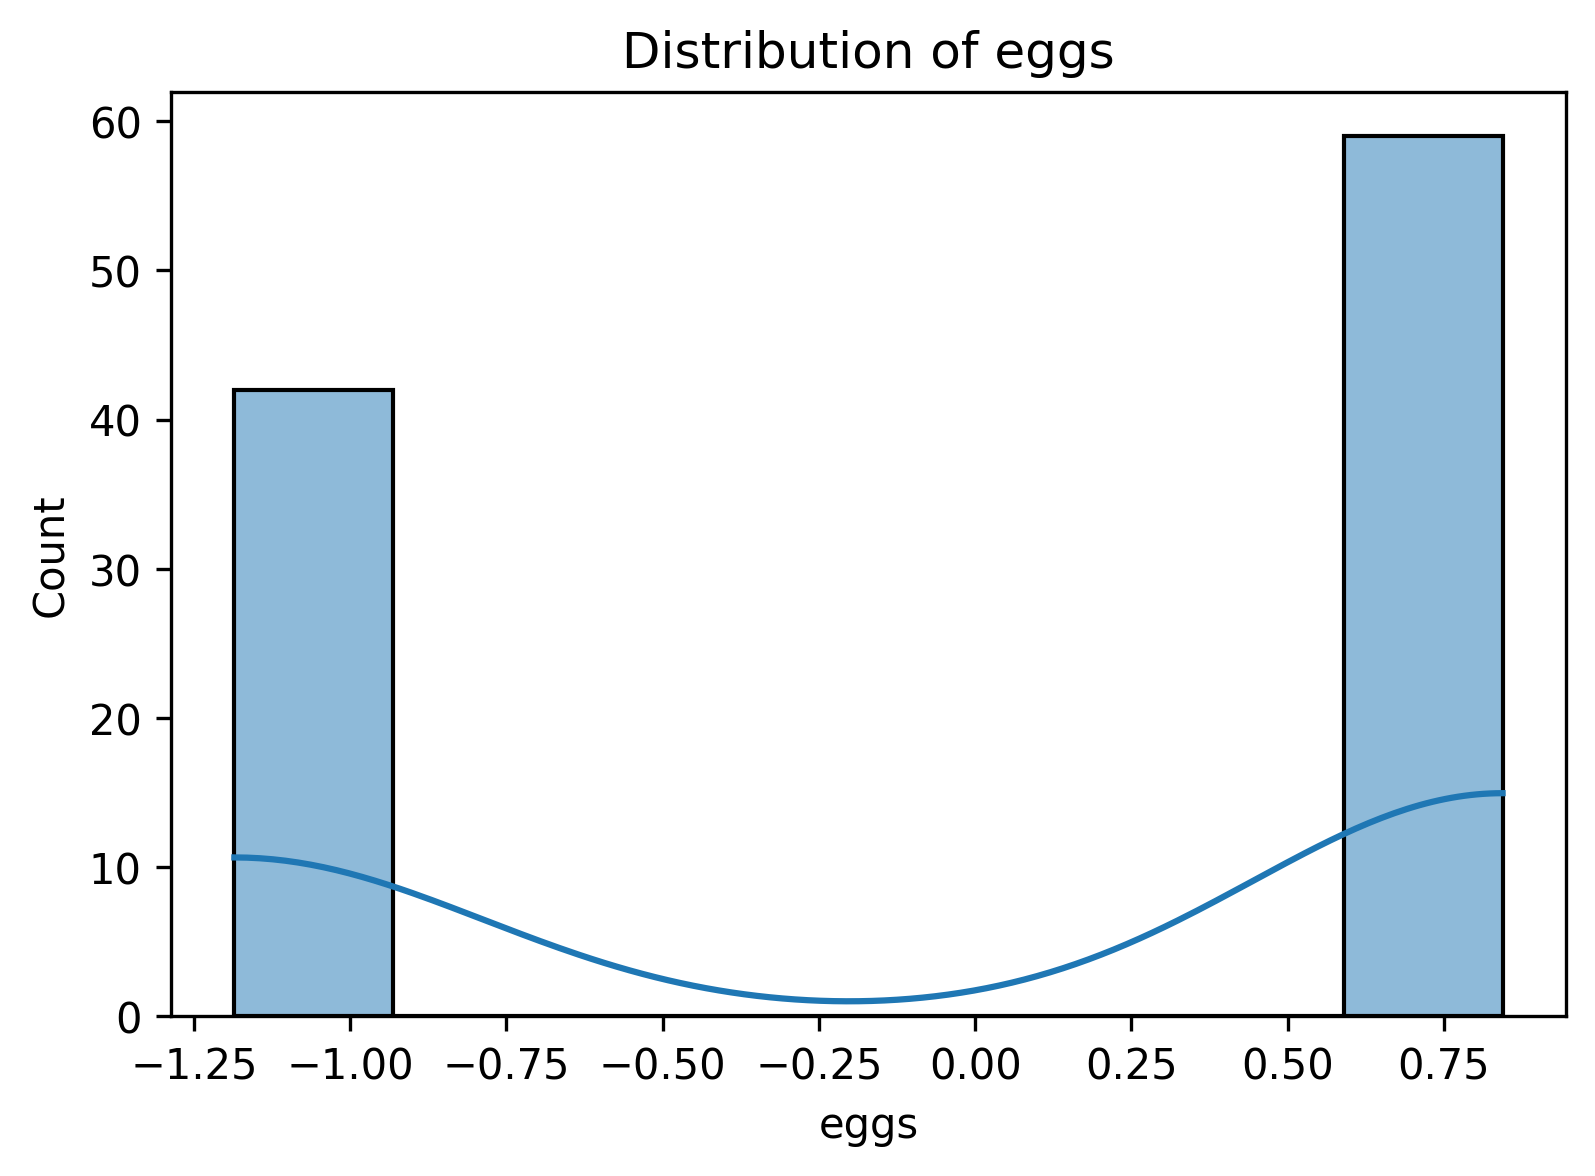

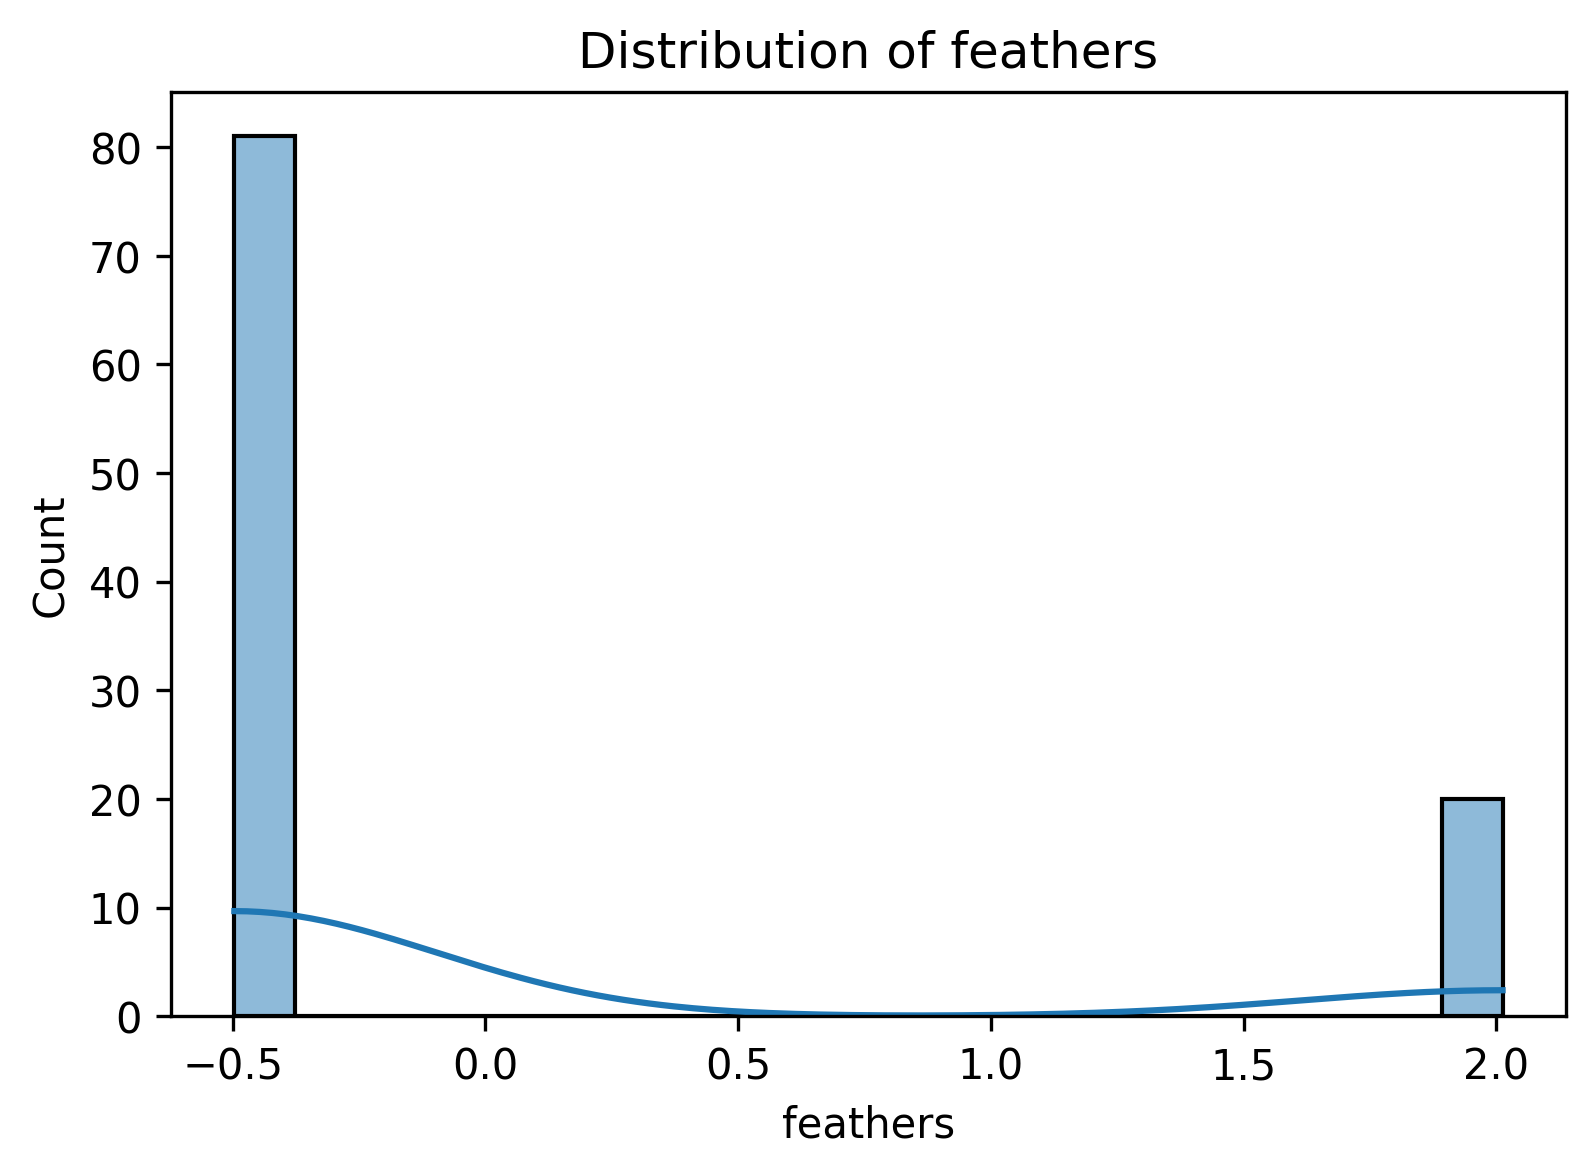

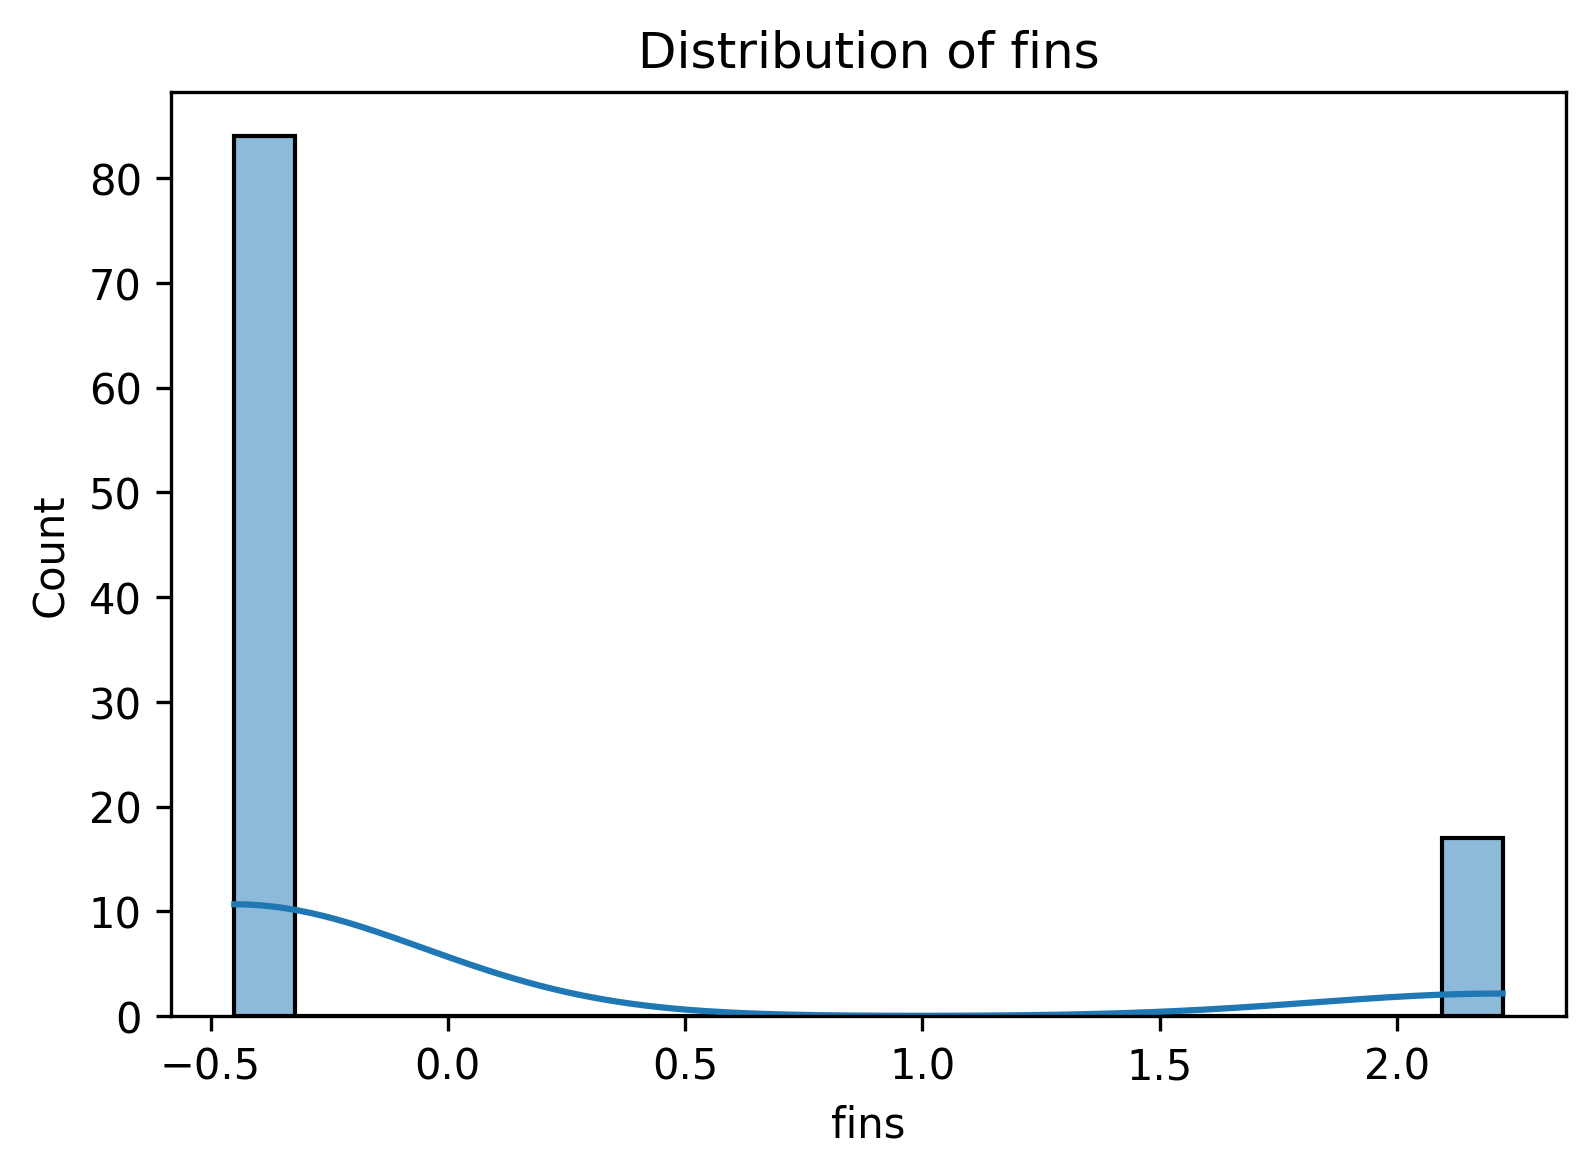

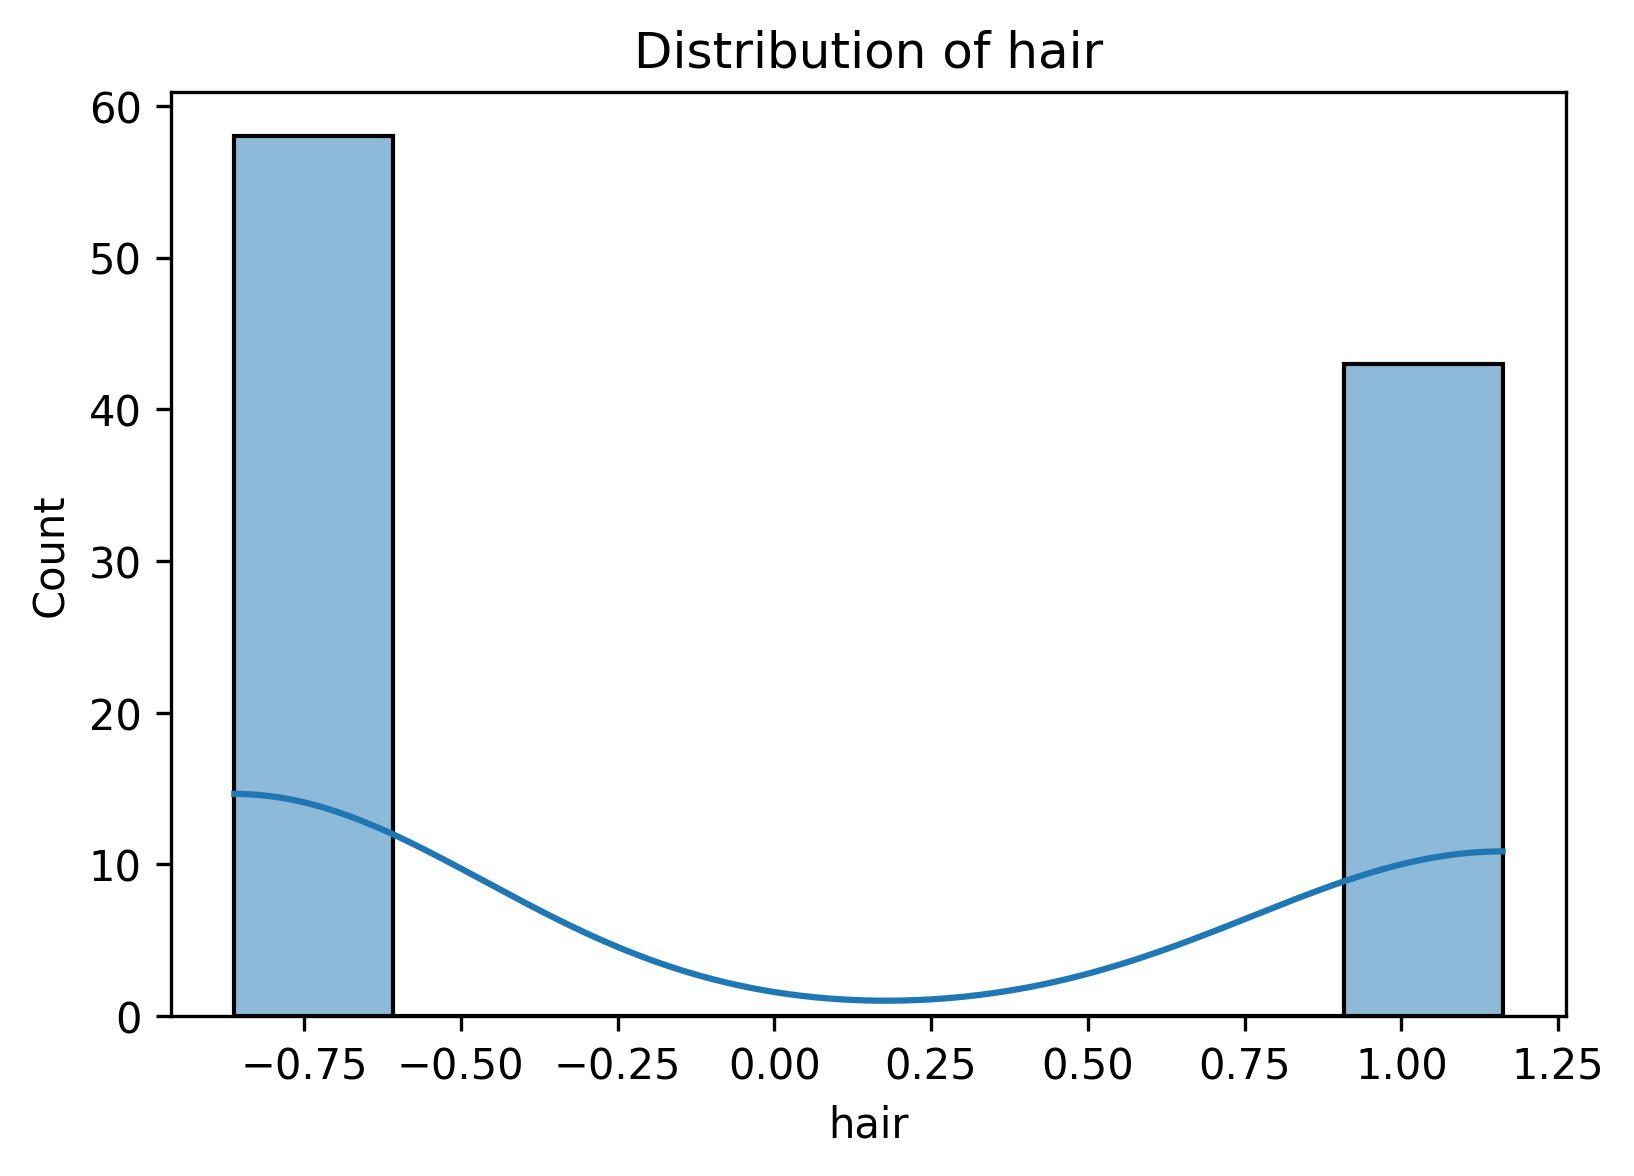

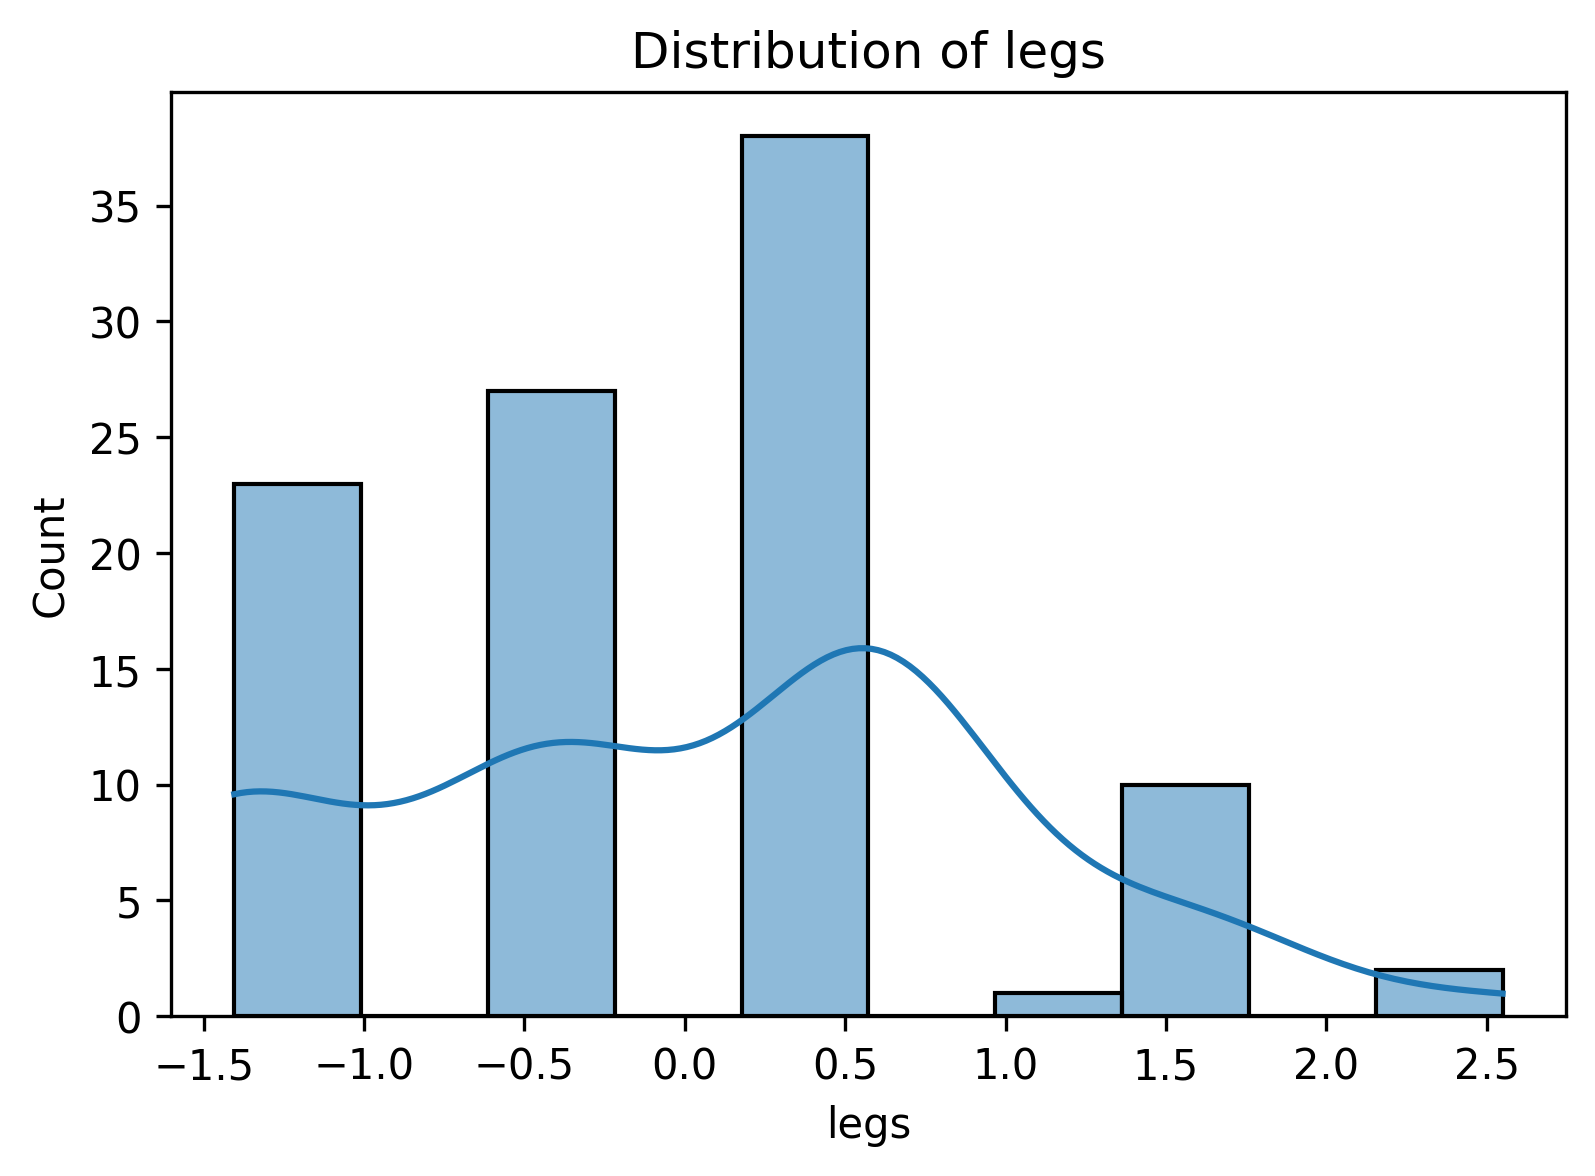

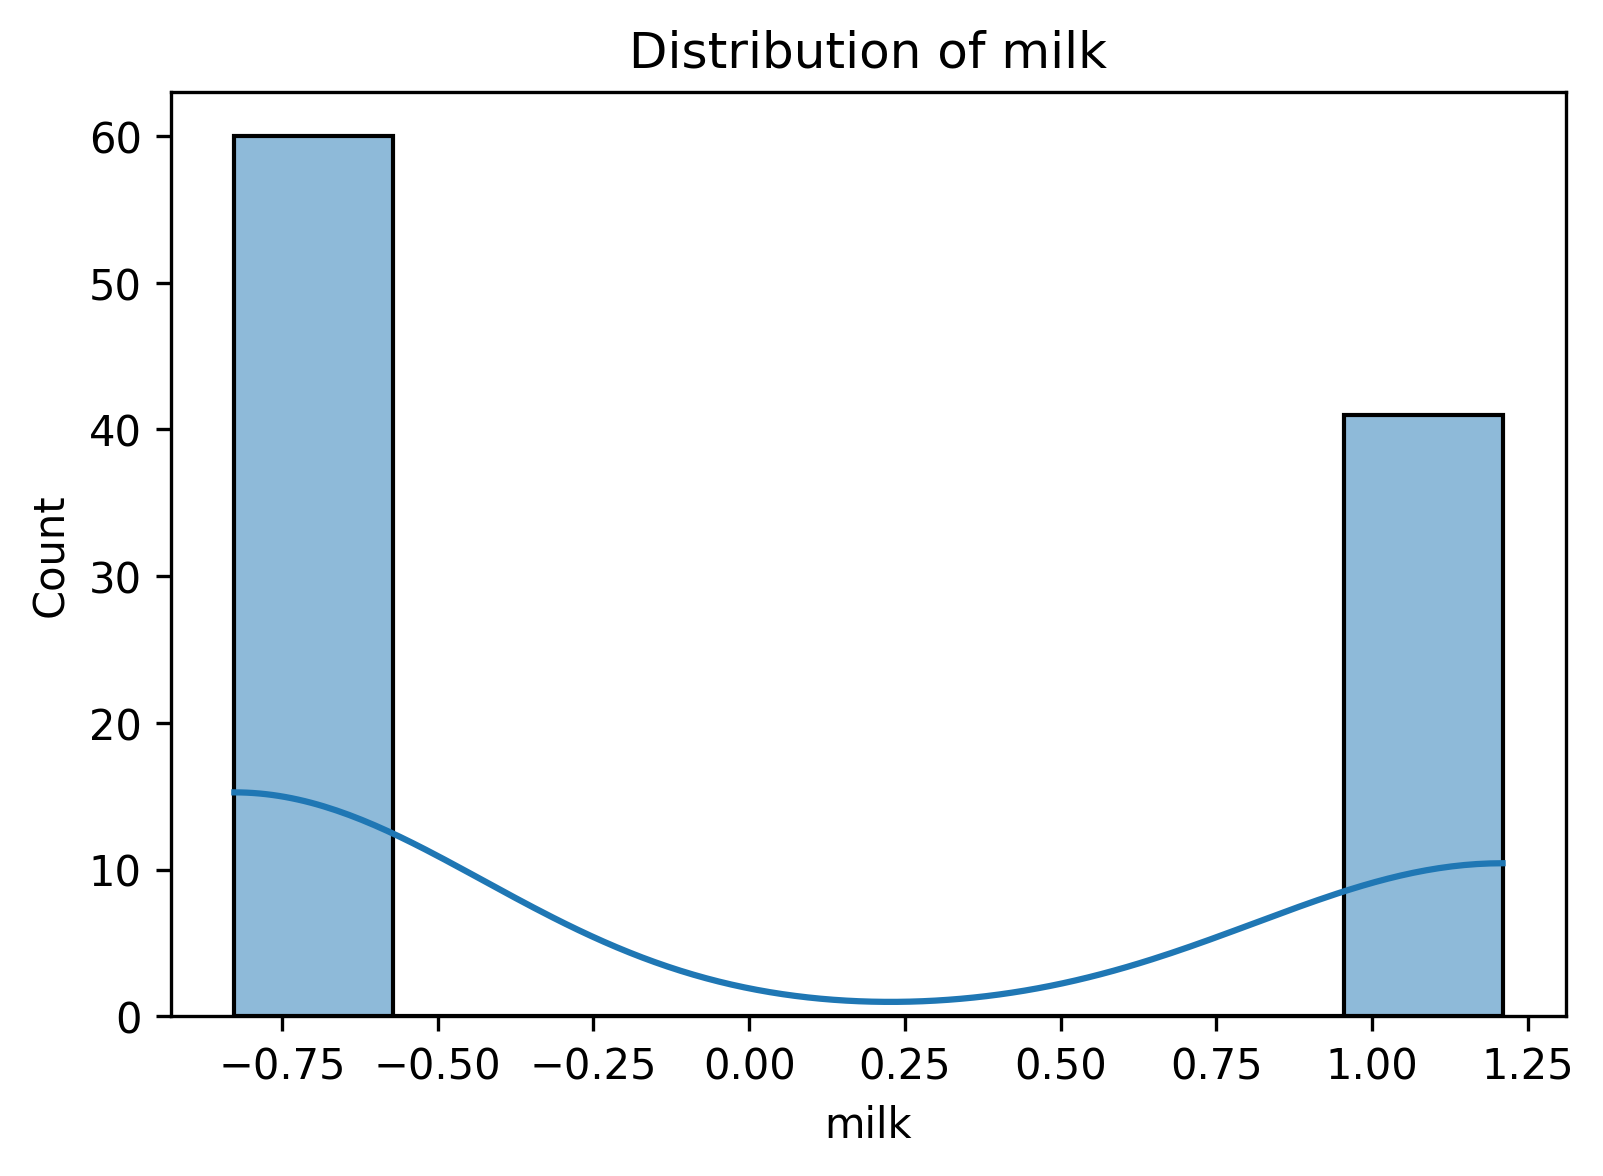

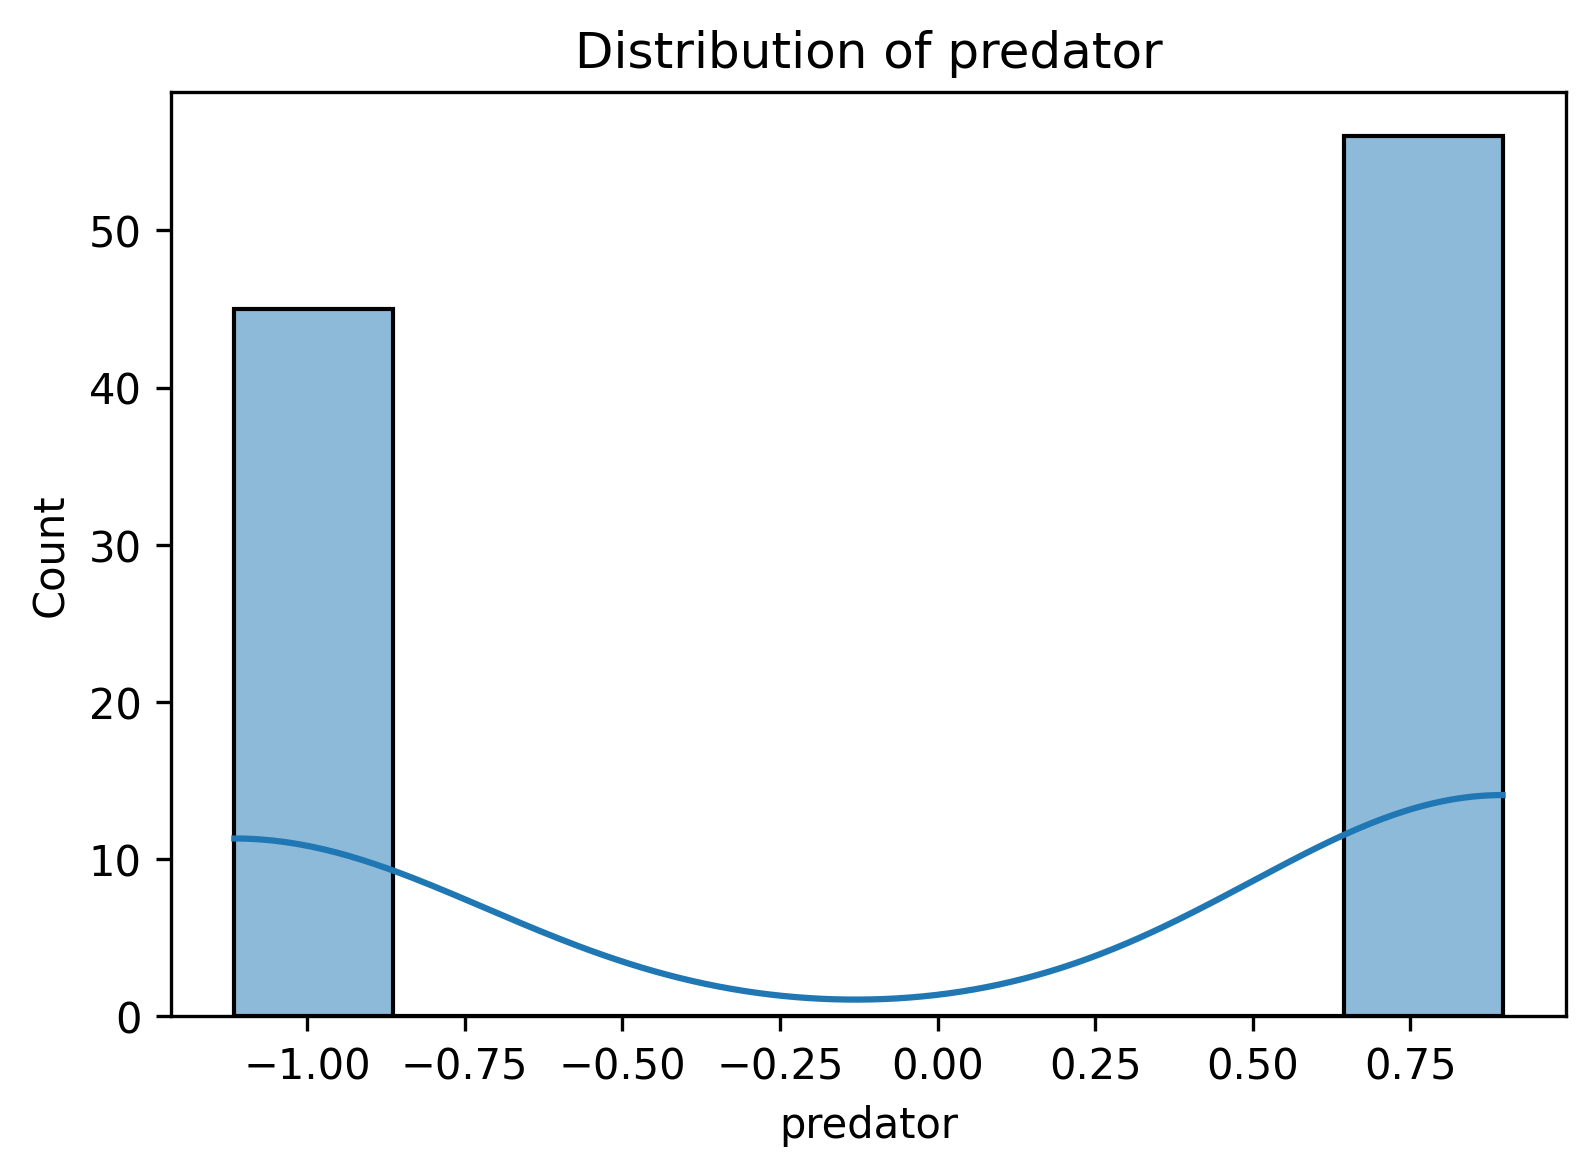

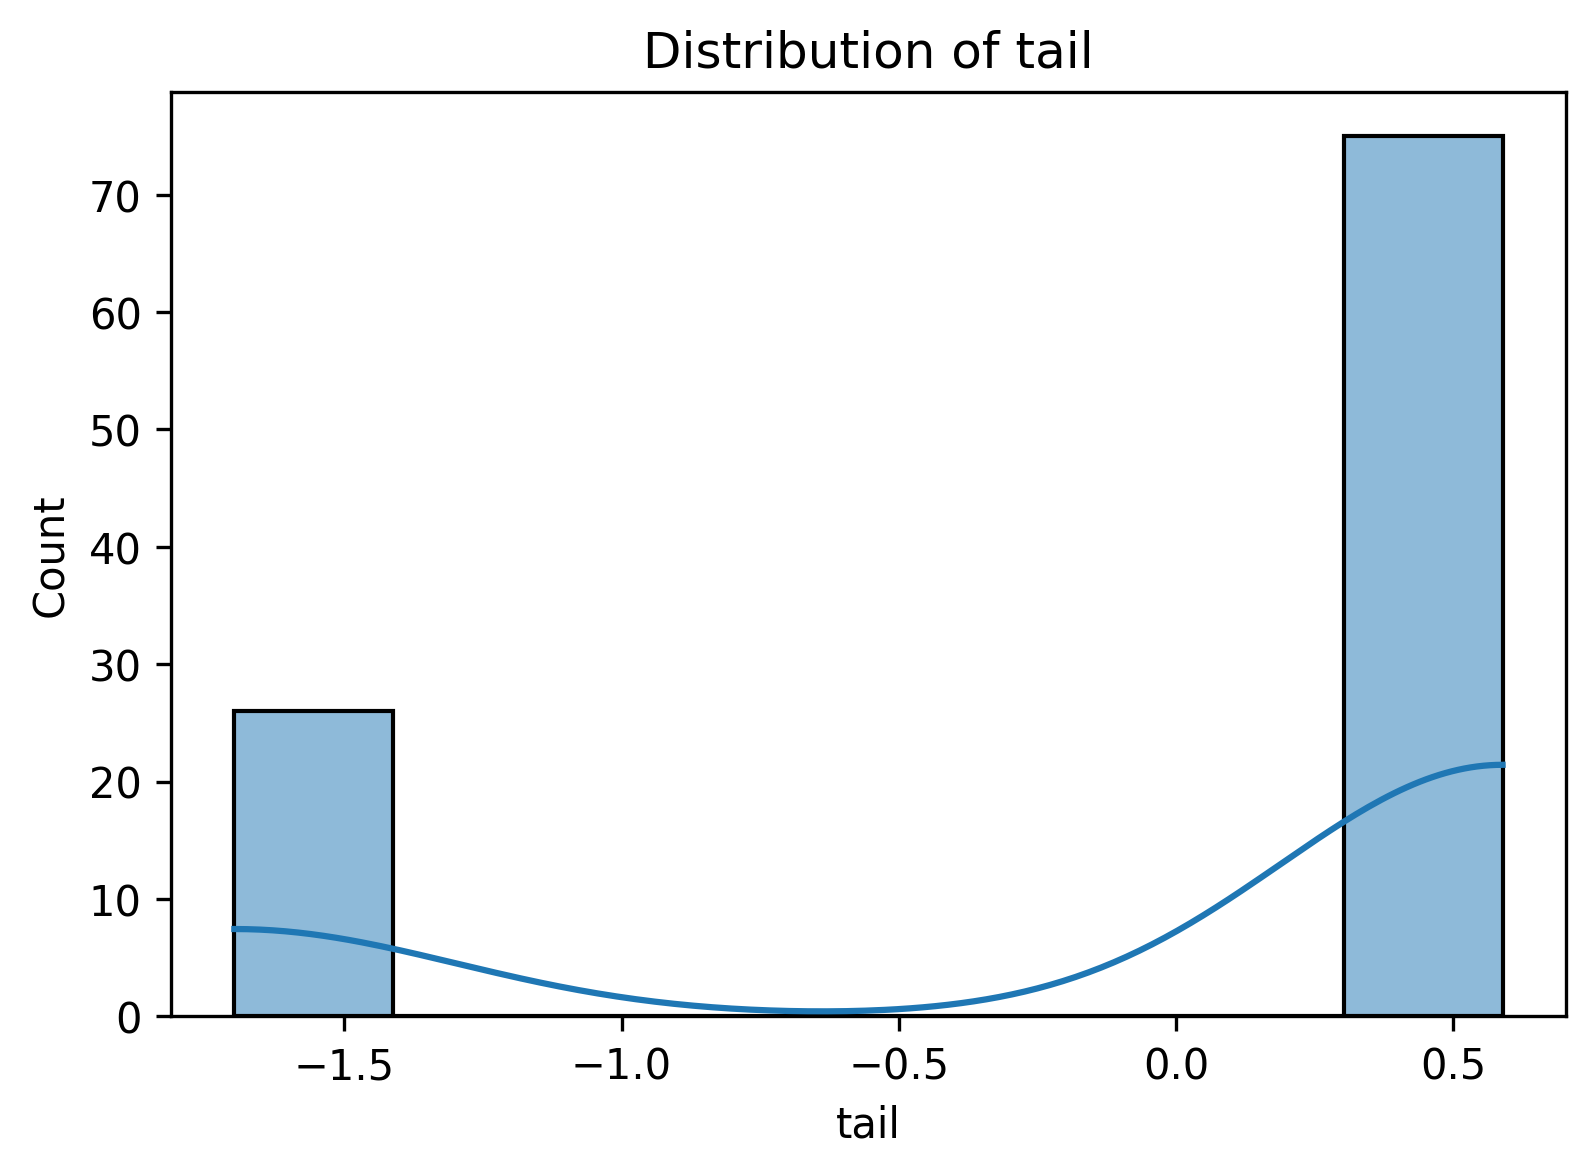

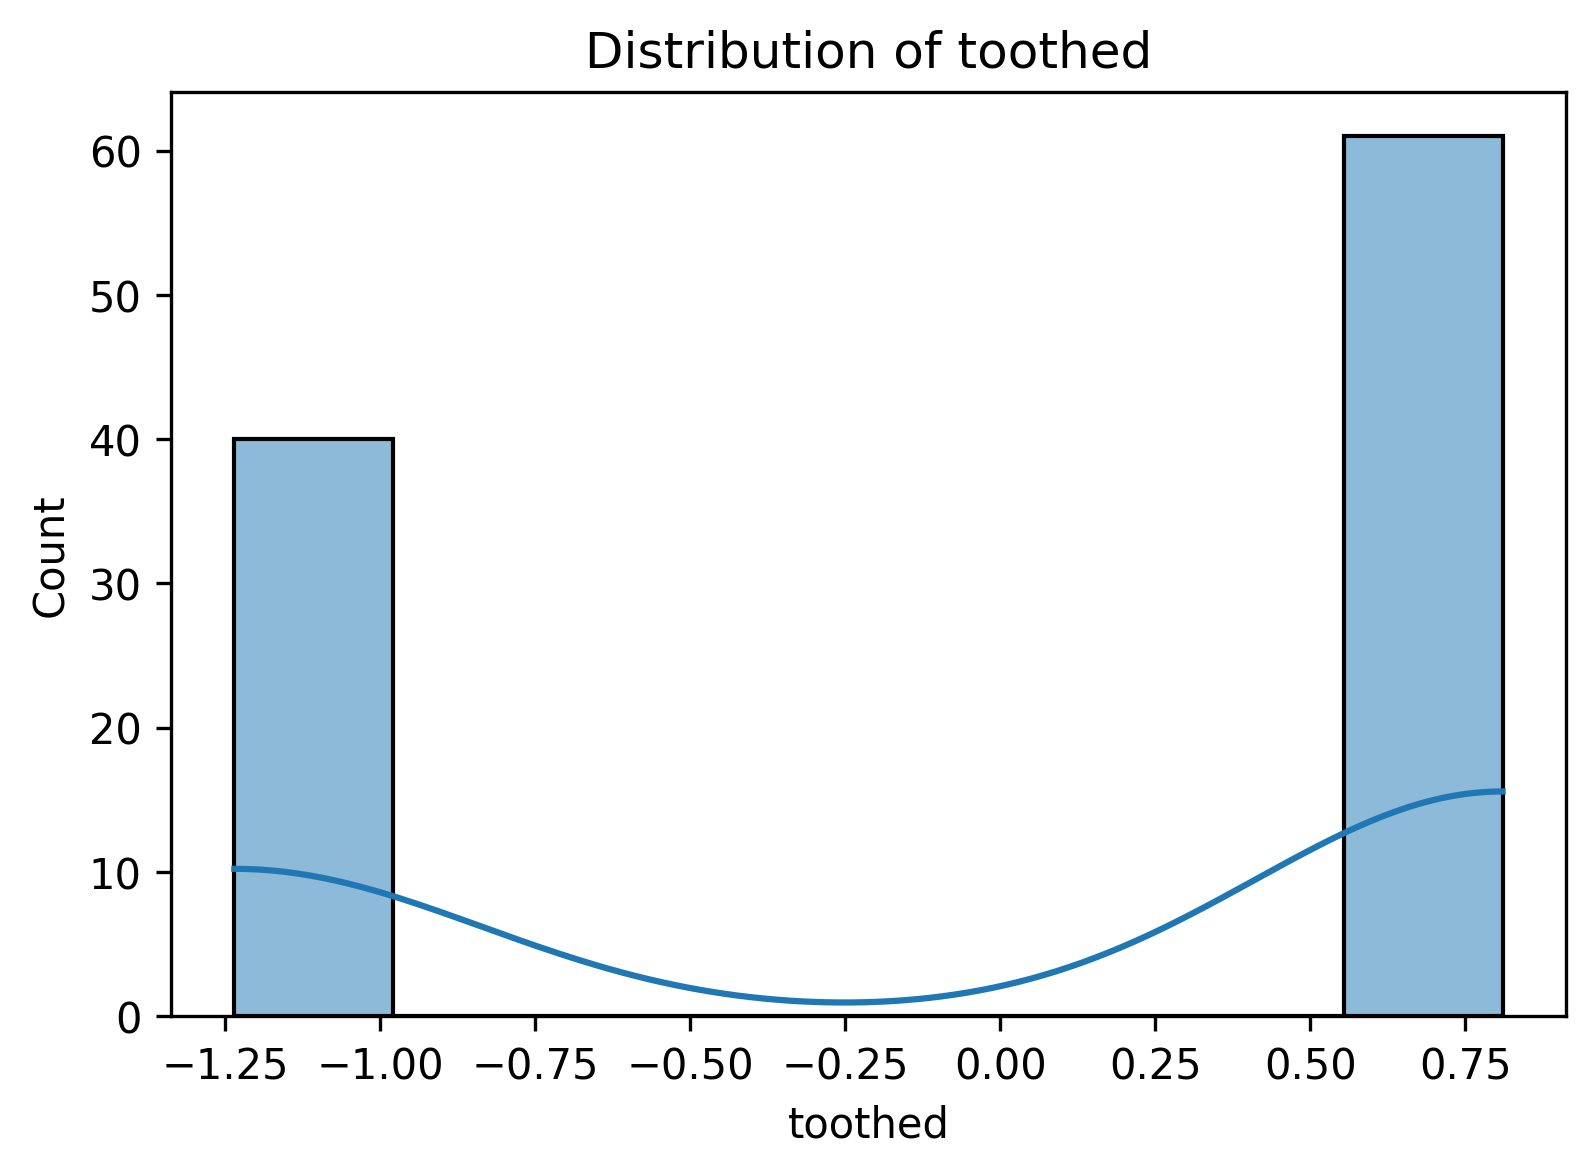

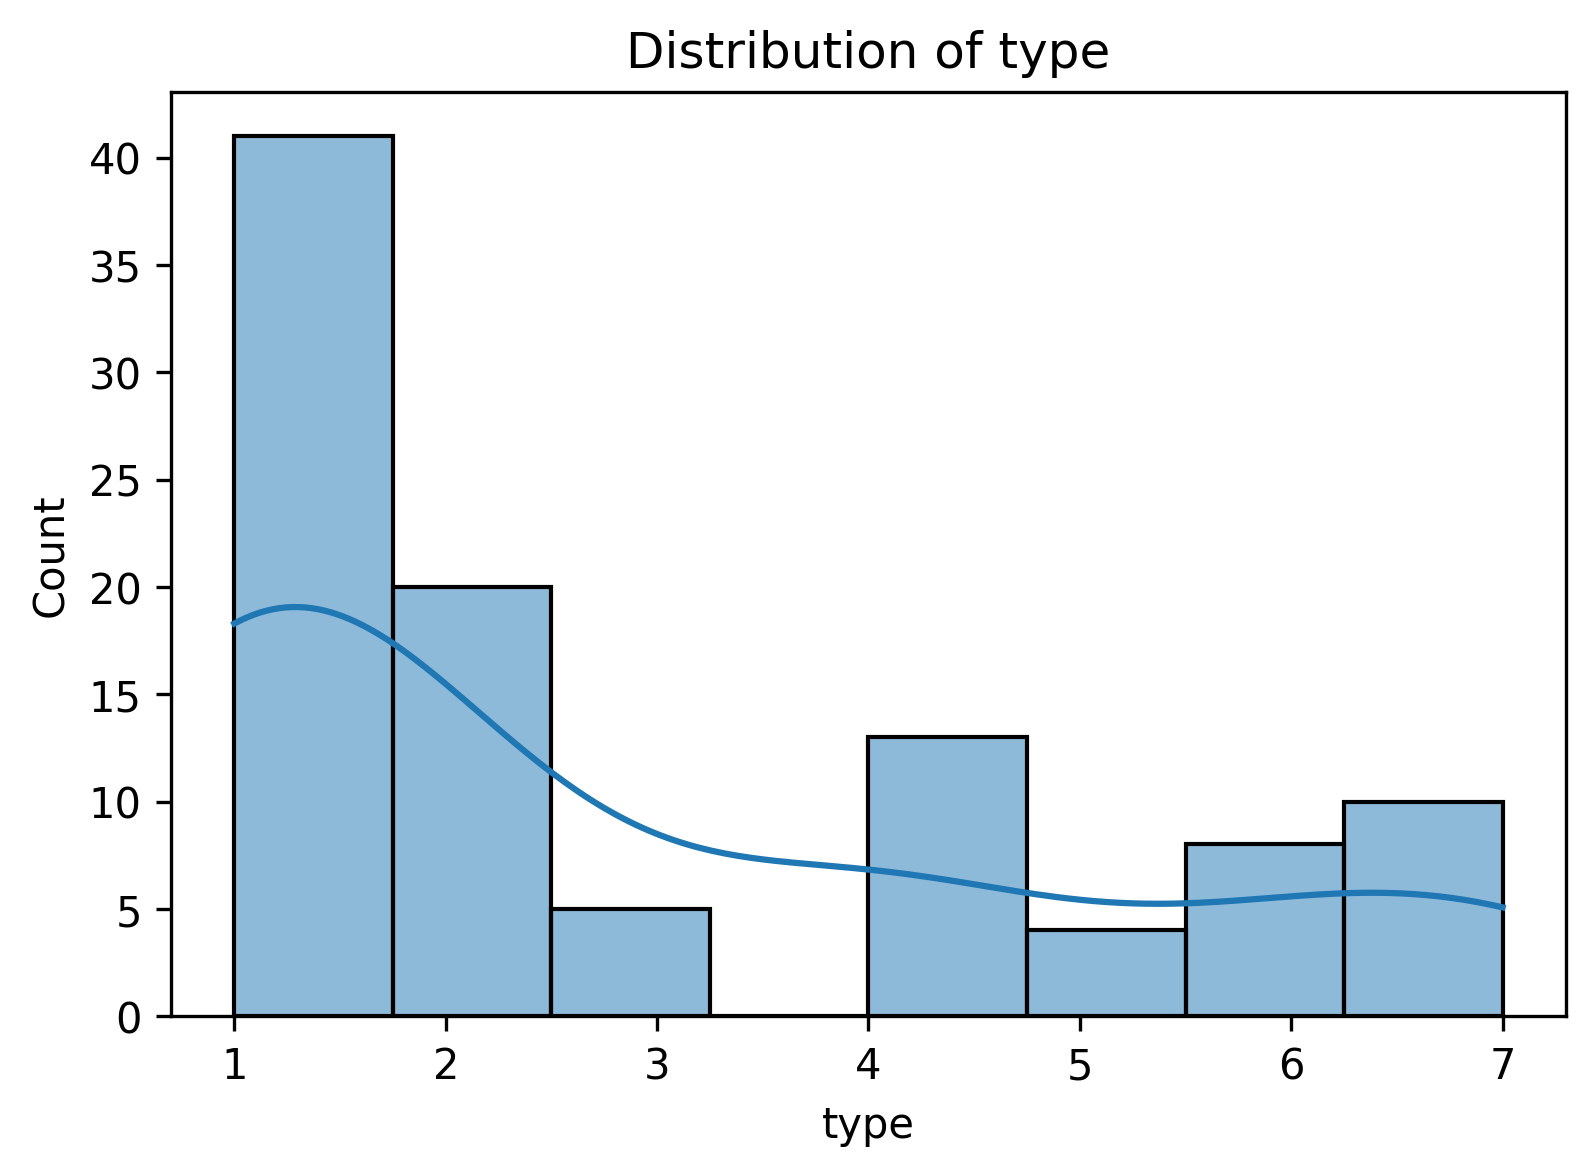

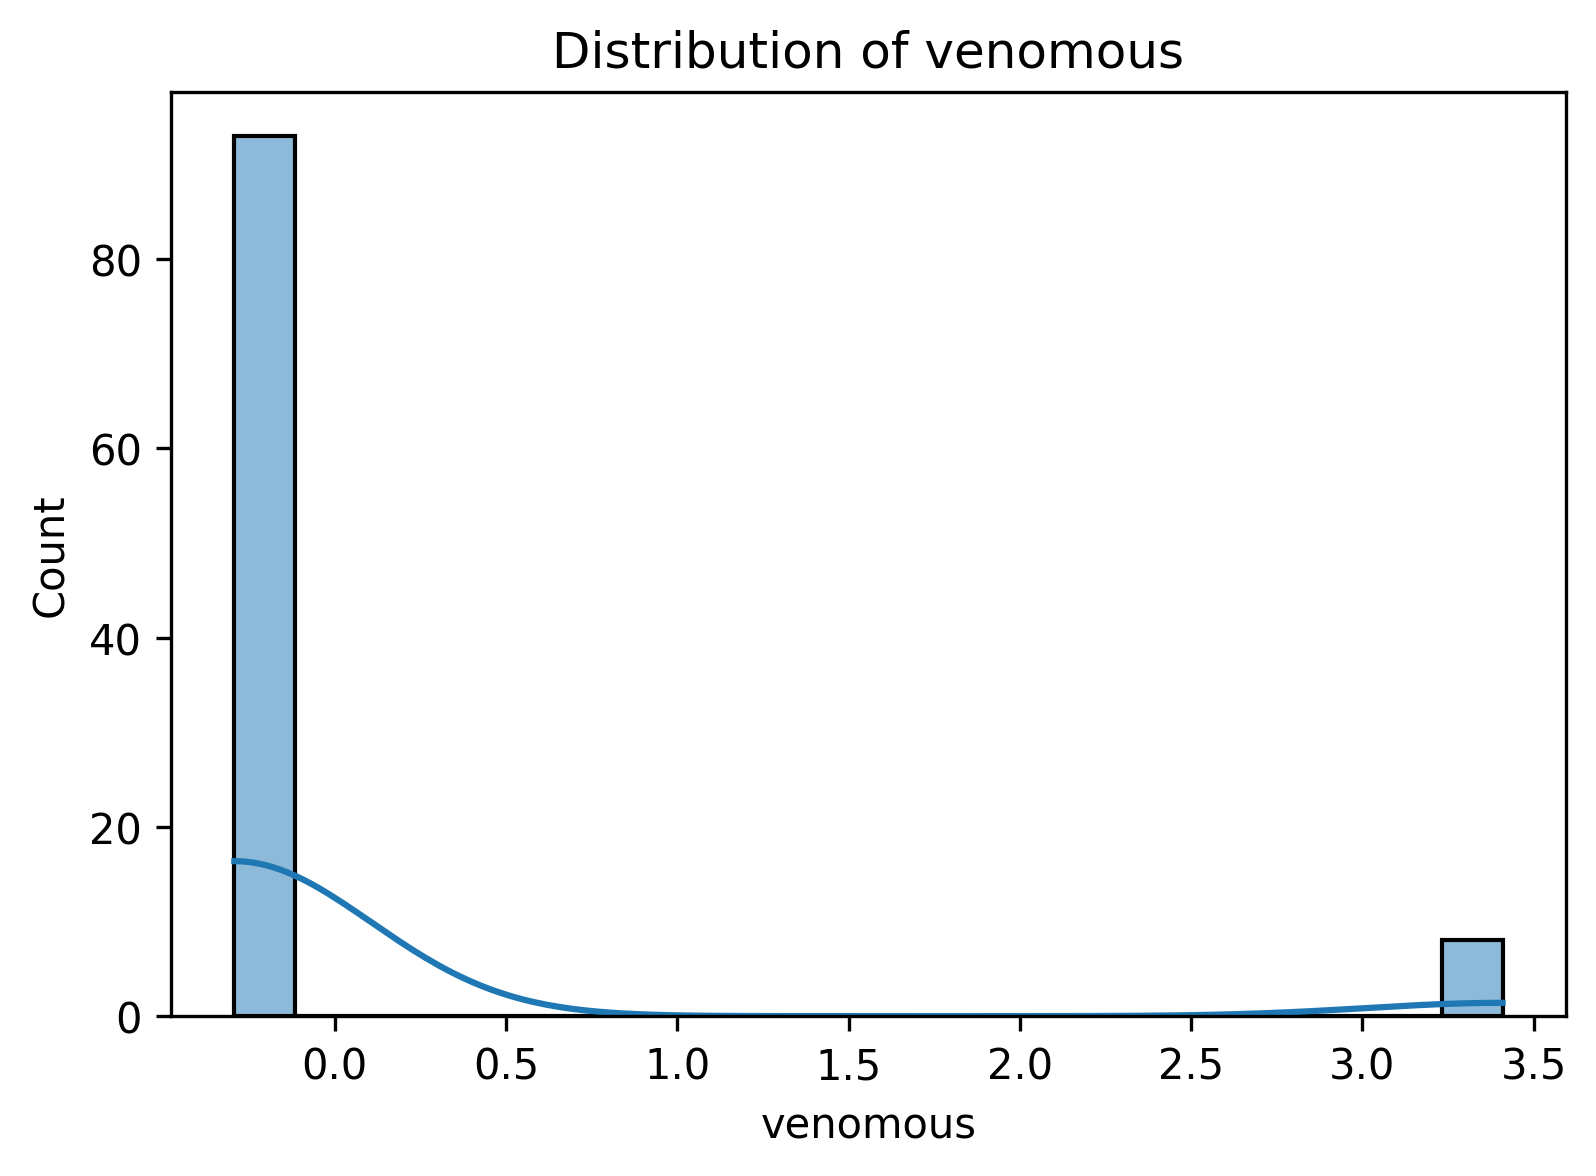

In [10]:
from IPython.display import Image, display
import os

for file in sorted(os.listdir("output/plots")):
    if file.endswith(".png"):
        display(Image(filename="output/plots/" + file))

## Full Pipeline Execution (Optional)

In [11]:
import main
main.main()


 KNN Zoo Classification App 

[INFO] Preparing output directories...
[INFO] Loading dataset from: data/Zoo.csv
[INFO] Dataset loaded successfully.
[INFO] Dataset shape: (101, 18)
[INFO] Columns: ['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

[INFO] Starting preprocessing pipeline...

[INFO] Checking for missing values...
[INFO] No missing values found.

[INFO] Detecting outliers using Z-score...
[INFO] Total outliers detected: 8

[INFO] Scaling features using StandardScaler...
[INFO] Feature scaling completed.
[INFO] Preprocessing completed successfully.

[INFO] Finding best K value for KNN...

[INFO] Finding best K value...
[INFO] K=1 → Accuracy=1.0000
[INFO] K=3 → Accuracy=0.9802
[INFO] K=5 → Accuracy=0.9802
[INFO] K=7 → Accuracy=0.9505
[INFO] K=9 → Accuracy=0.9505
[INFO] K=11 → Accuracy=0.9010
[INFO] K=13 → Accuracy=0.8812
[RESULT] Best K = 

## Conclusion

In this project, KNN algorithm was successfully implemented
to classify animals using the Zoo dataset.

Feature scaling helped improve performance and
visualizations helped understand the model better.
